In [1]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort3")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2024-07-04 16:58:15,543][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2024-07-04 16:58:16,738][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [2]:
# ANIMALS
ANIMAL_IDS = [
    "R030",
    "R031",
    "R032",
    "R033",
    "R034",
    "R035",
    "R036",
    "R037",
    "R038",
    "R039",
]
mode = "today"

if mode == "today":
    date = datetime.today().date()
    latest_date = None
elif mode == "yesterday":
    date = datetime.today().date() - timedelta(days=1)
    latest_date = date.strftime("%Y-%m-%d")

# DATES
date_min, date_max = dju.return_date_window(latest_date=latest_date, n_days_back=20)

In [3]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

fetched 20 sessions for R030 between 2024-06-14 and 2024-07-04
fetched 20 sessions for R031 between 2024-06-14 and 2024-07-04
fetched 20 sessions for R032 between 2024-06-14 and 2024-07-04
fetched 19 sessions for R033 between 2024-06-14 and 2024-07-04
fetched 19 sessions for R034 between 2024-06-14 and 2024-07-02
fetched 20 sessions for R035 between 2024-06-14 and 2024-07-04
fetched 20 sessions for R036 between 2024-06-14 and 2024-07-04
fetched 20 sessions for R037 between 2024-06-14 and 2024-07-04
fetched 13 sessions for R038 between 2024-06-14 and 2024-06-28
fetched 20 sessions for R039 between 2024-06-14 and 2024-07-04


In [4]:
days_df = create_days_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max, verbose=True
)

Fetched data from SessionAggDate table from 2024-06-14 to 2024-07-02  
Today's data exits and has been added to SessionAggDate.

192 daily summaries fetched for animals: 
['R030', 'R031', 'R032', 'R033', 'R034', 'R035', 'R036', 'R037', 'R038', 'R039']
between 2024-06-14 and 2024-07-04


/Users/jessbreda/anaconda3/envs/bl_dj_310/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/jessbreda/anaconda3/envs/bl_dj_310/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/jessbreda/anaconda3/envs/bl_dj_310/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/jessbreda/anaconda3/envs/bl_dj_310/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/jessbreda/anaconda3/envs/bl_dj_310/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/jessbreda/anaconda3/envs/bl_dj_310/lib/python3.10/site-packages/matplotli

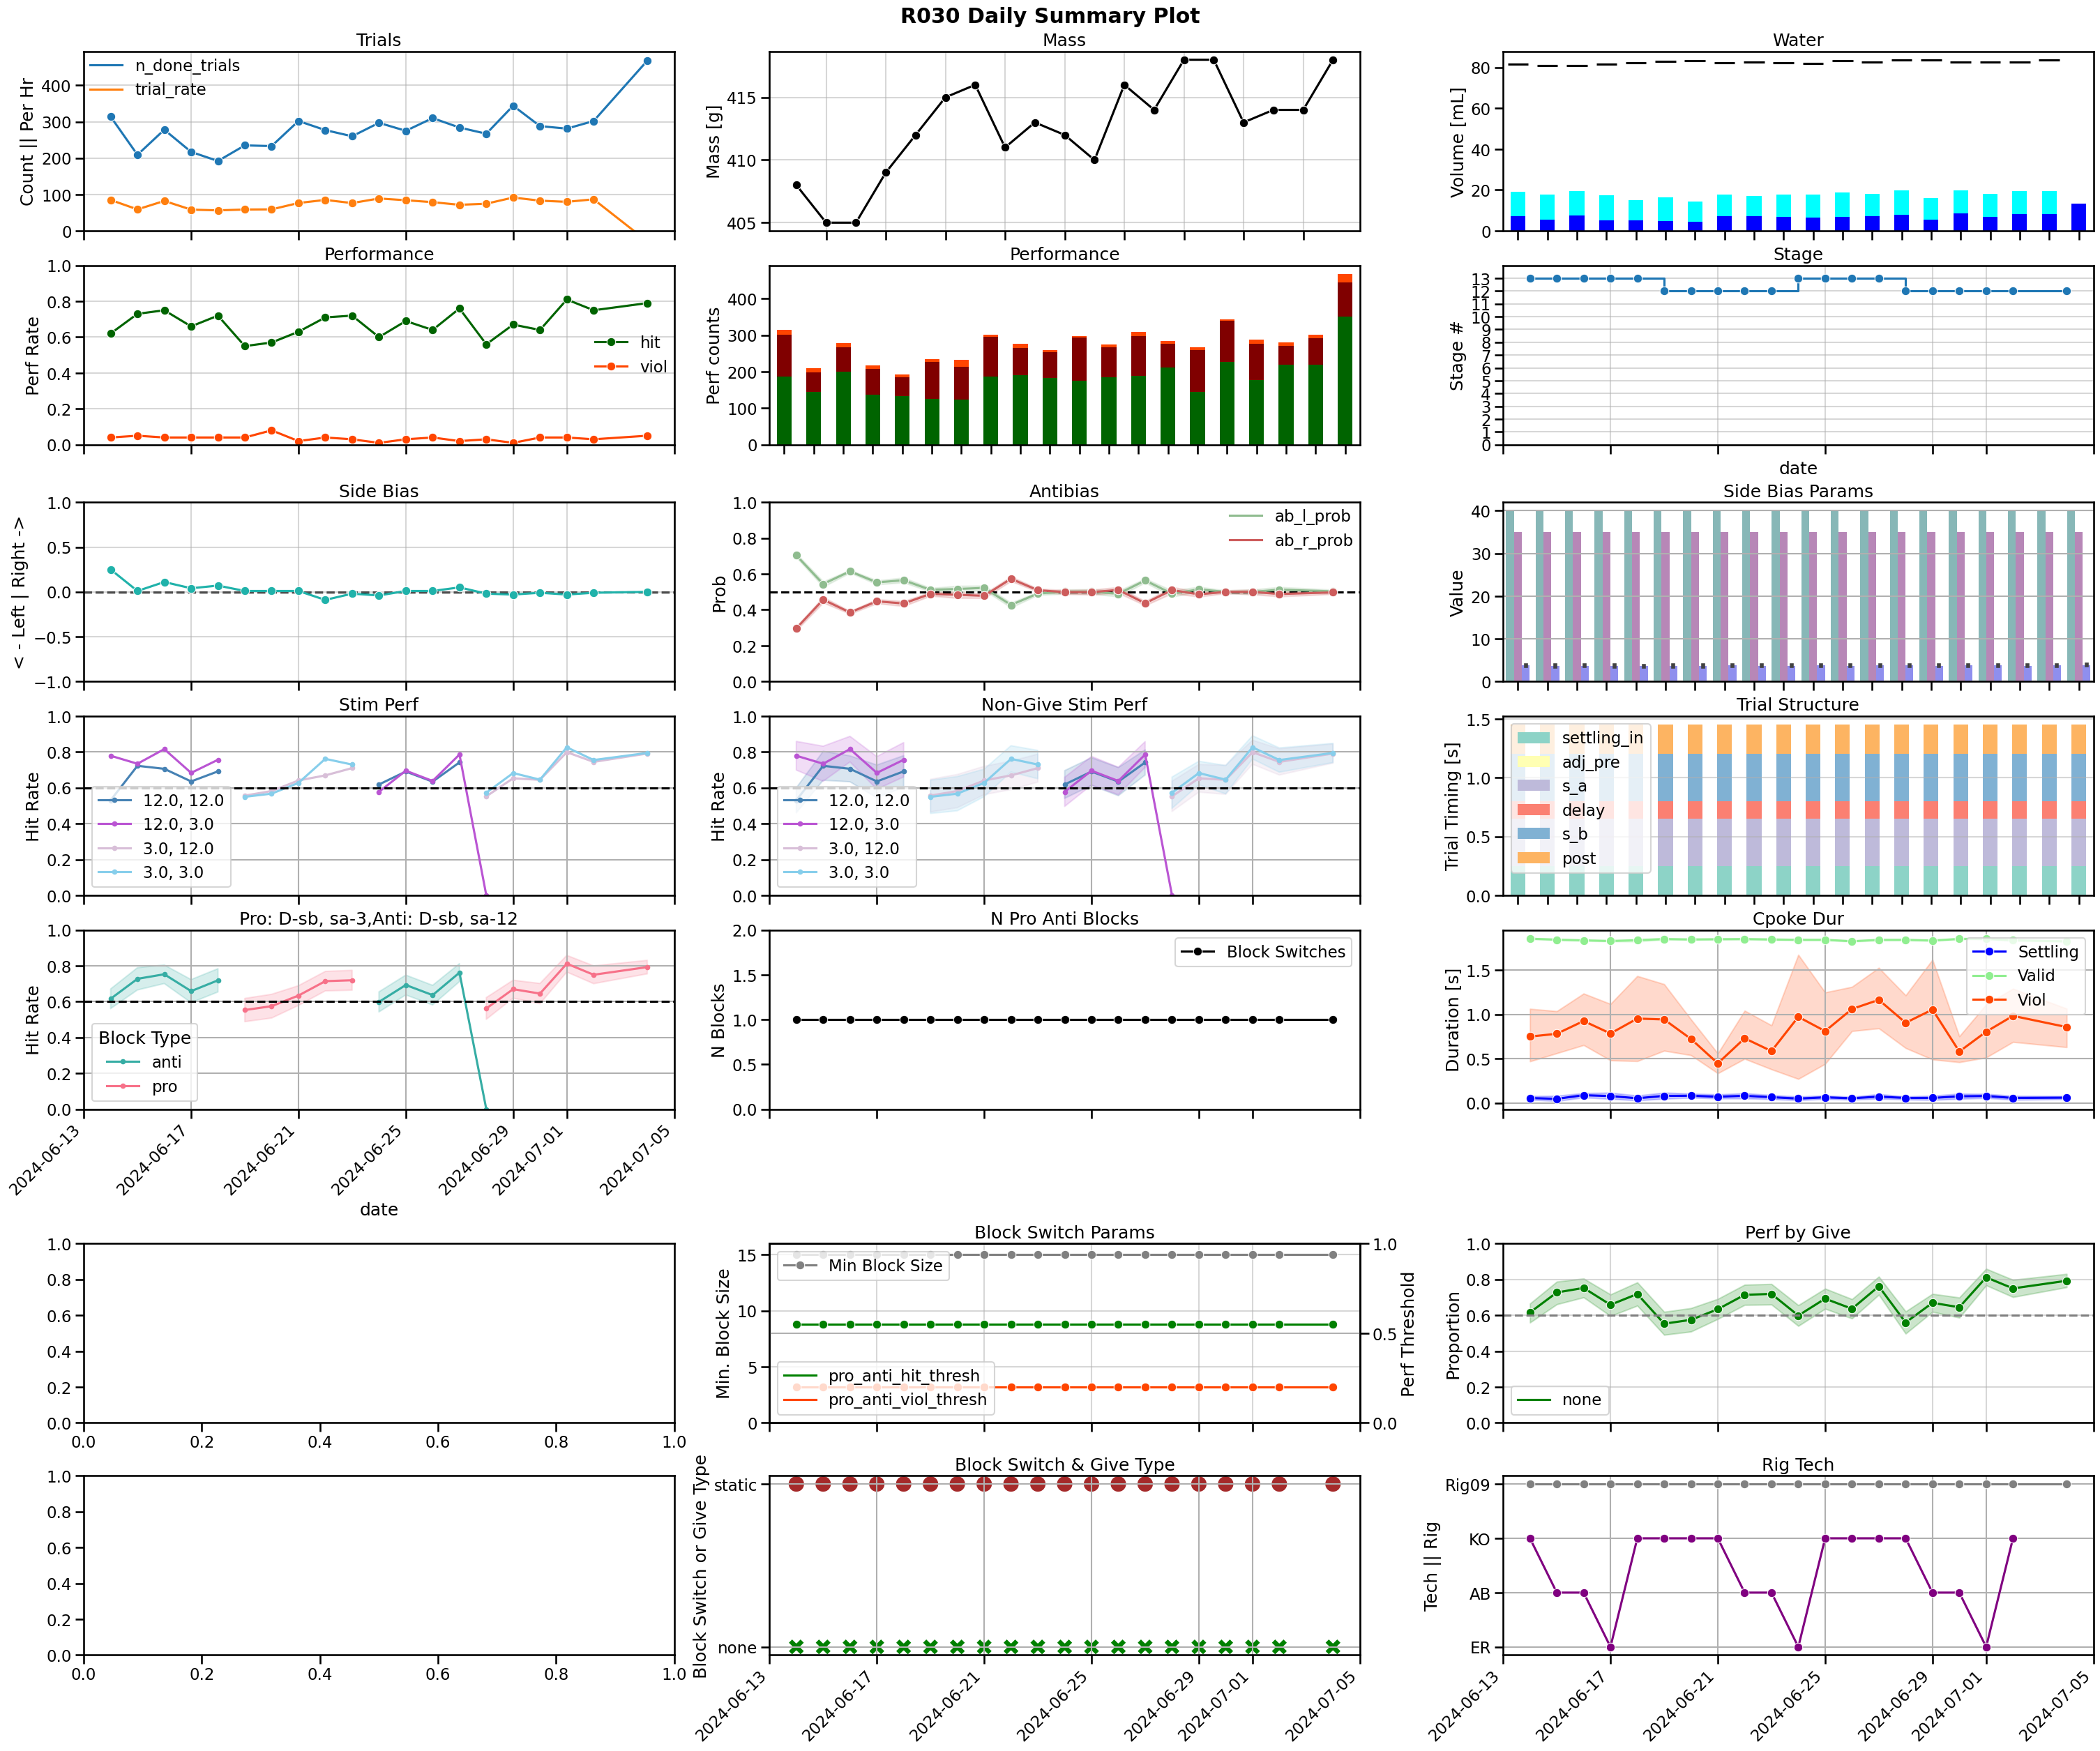

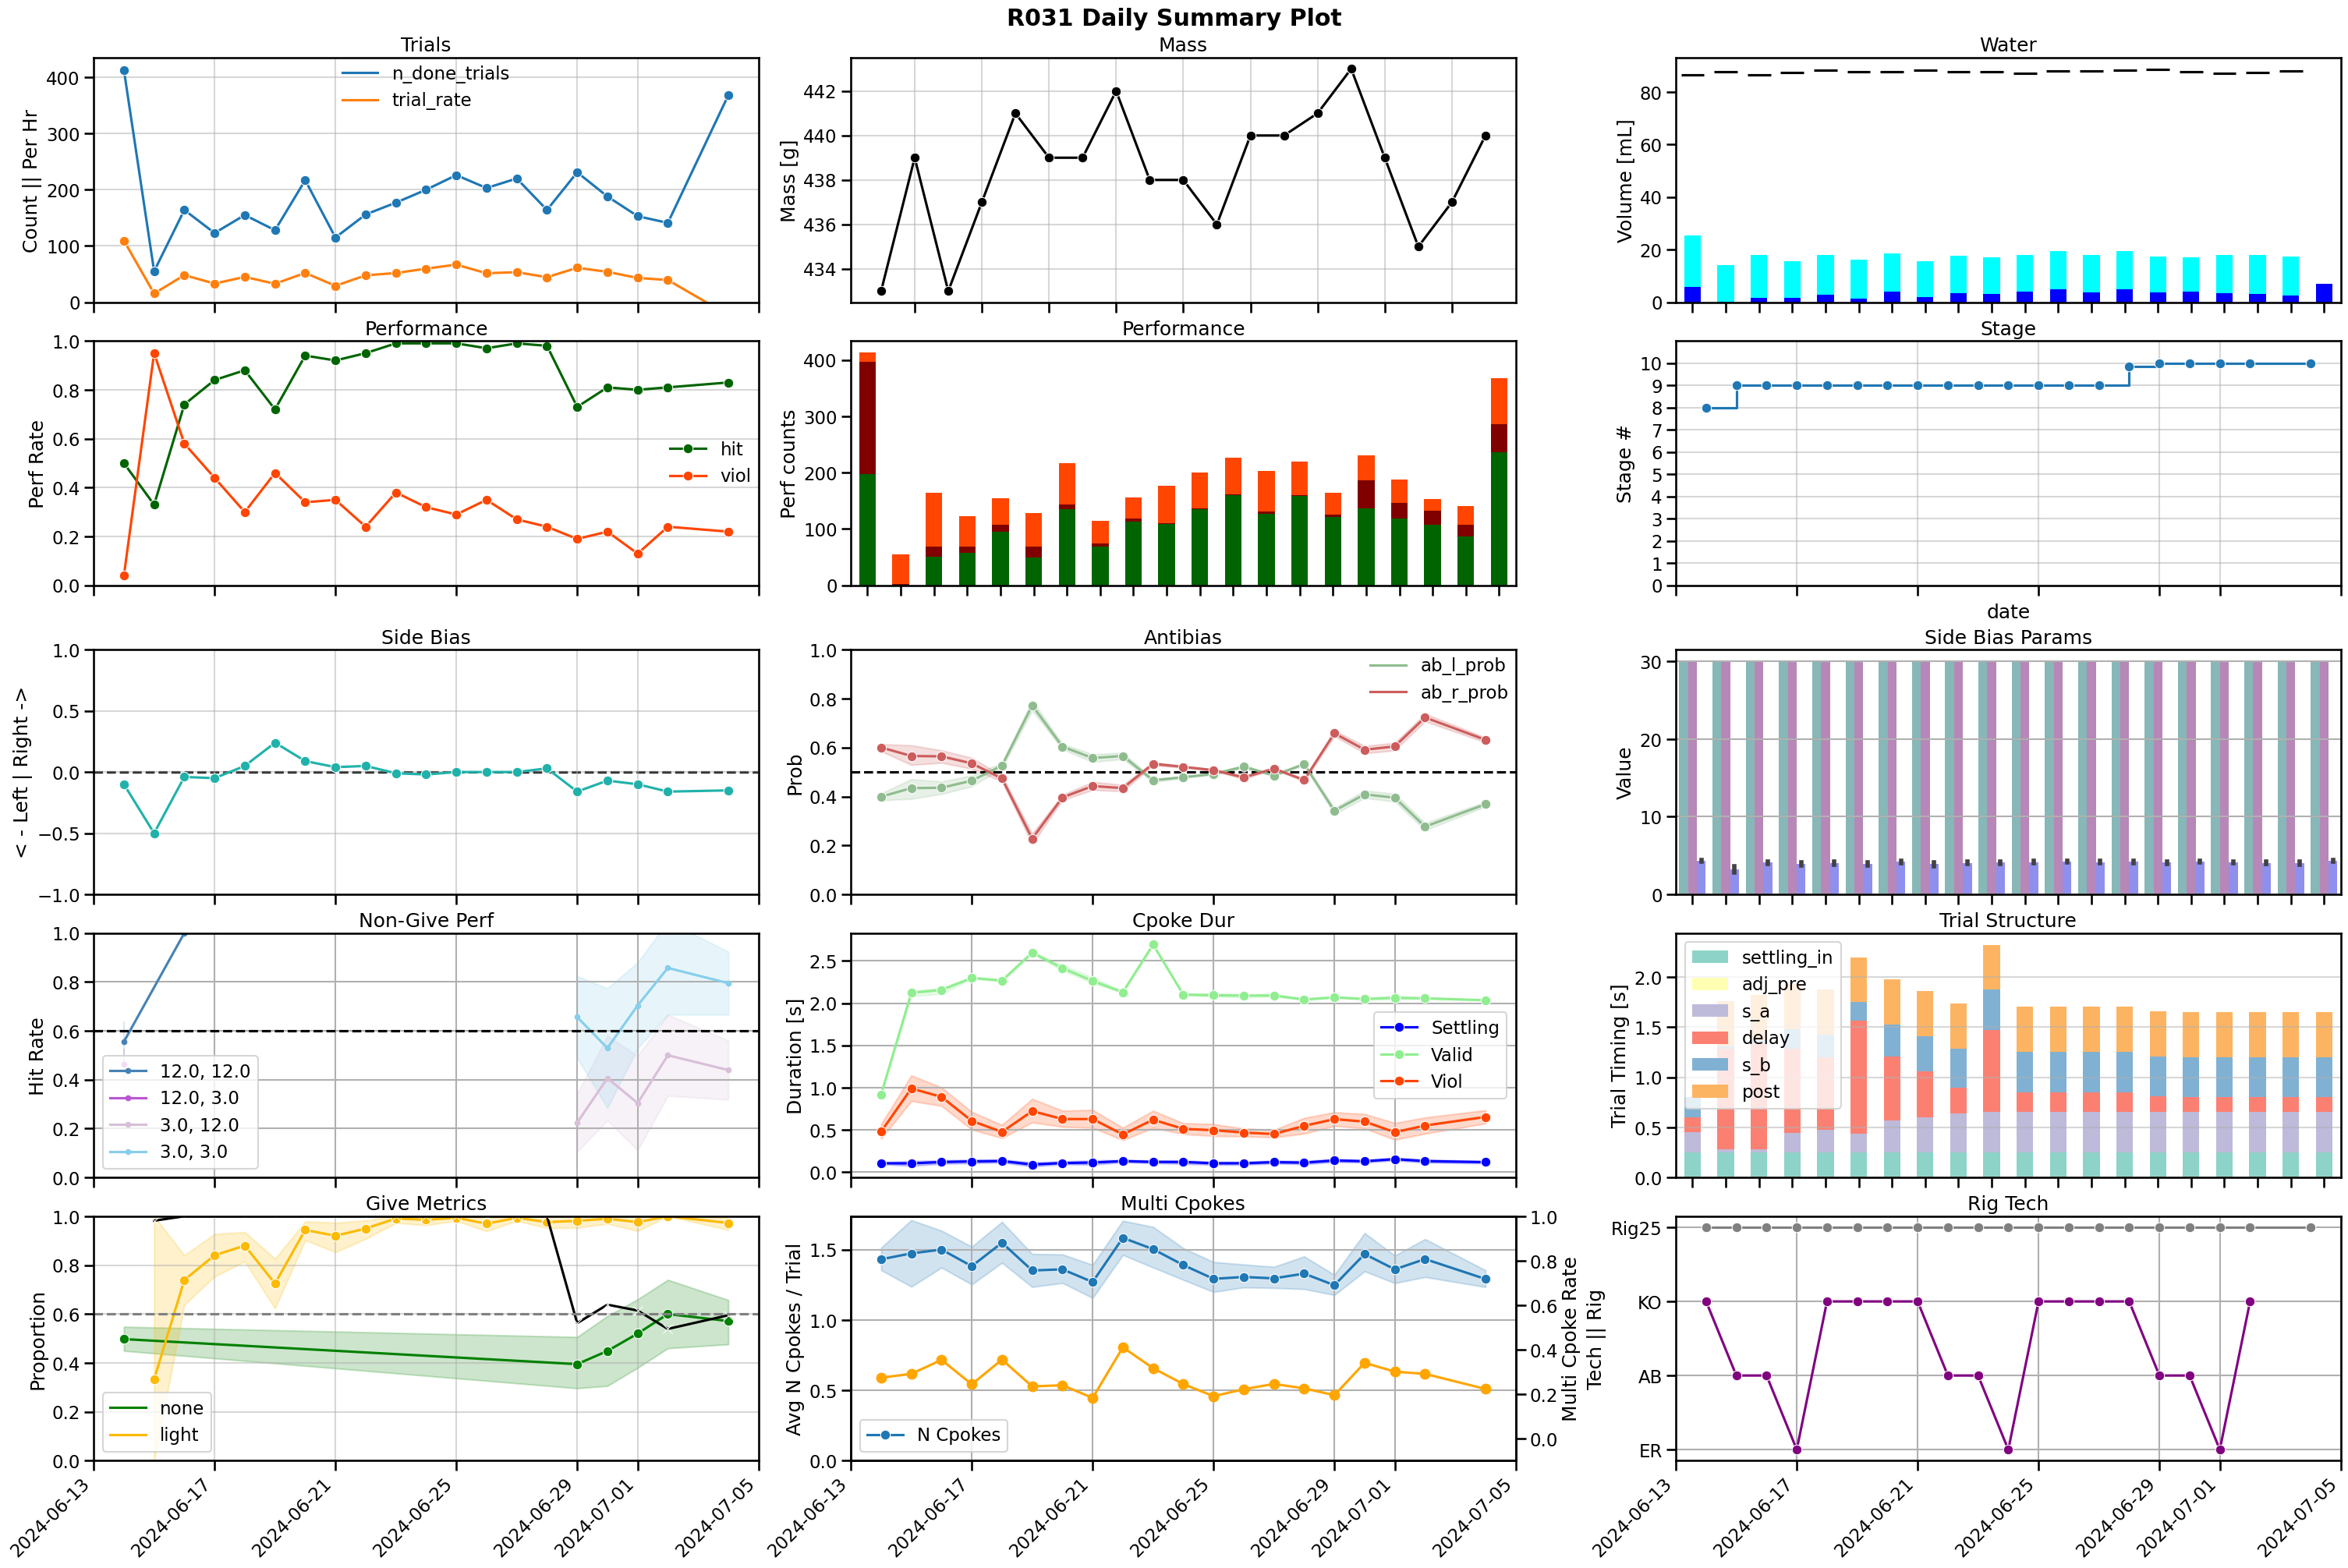

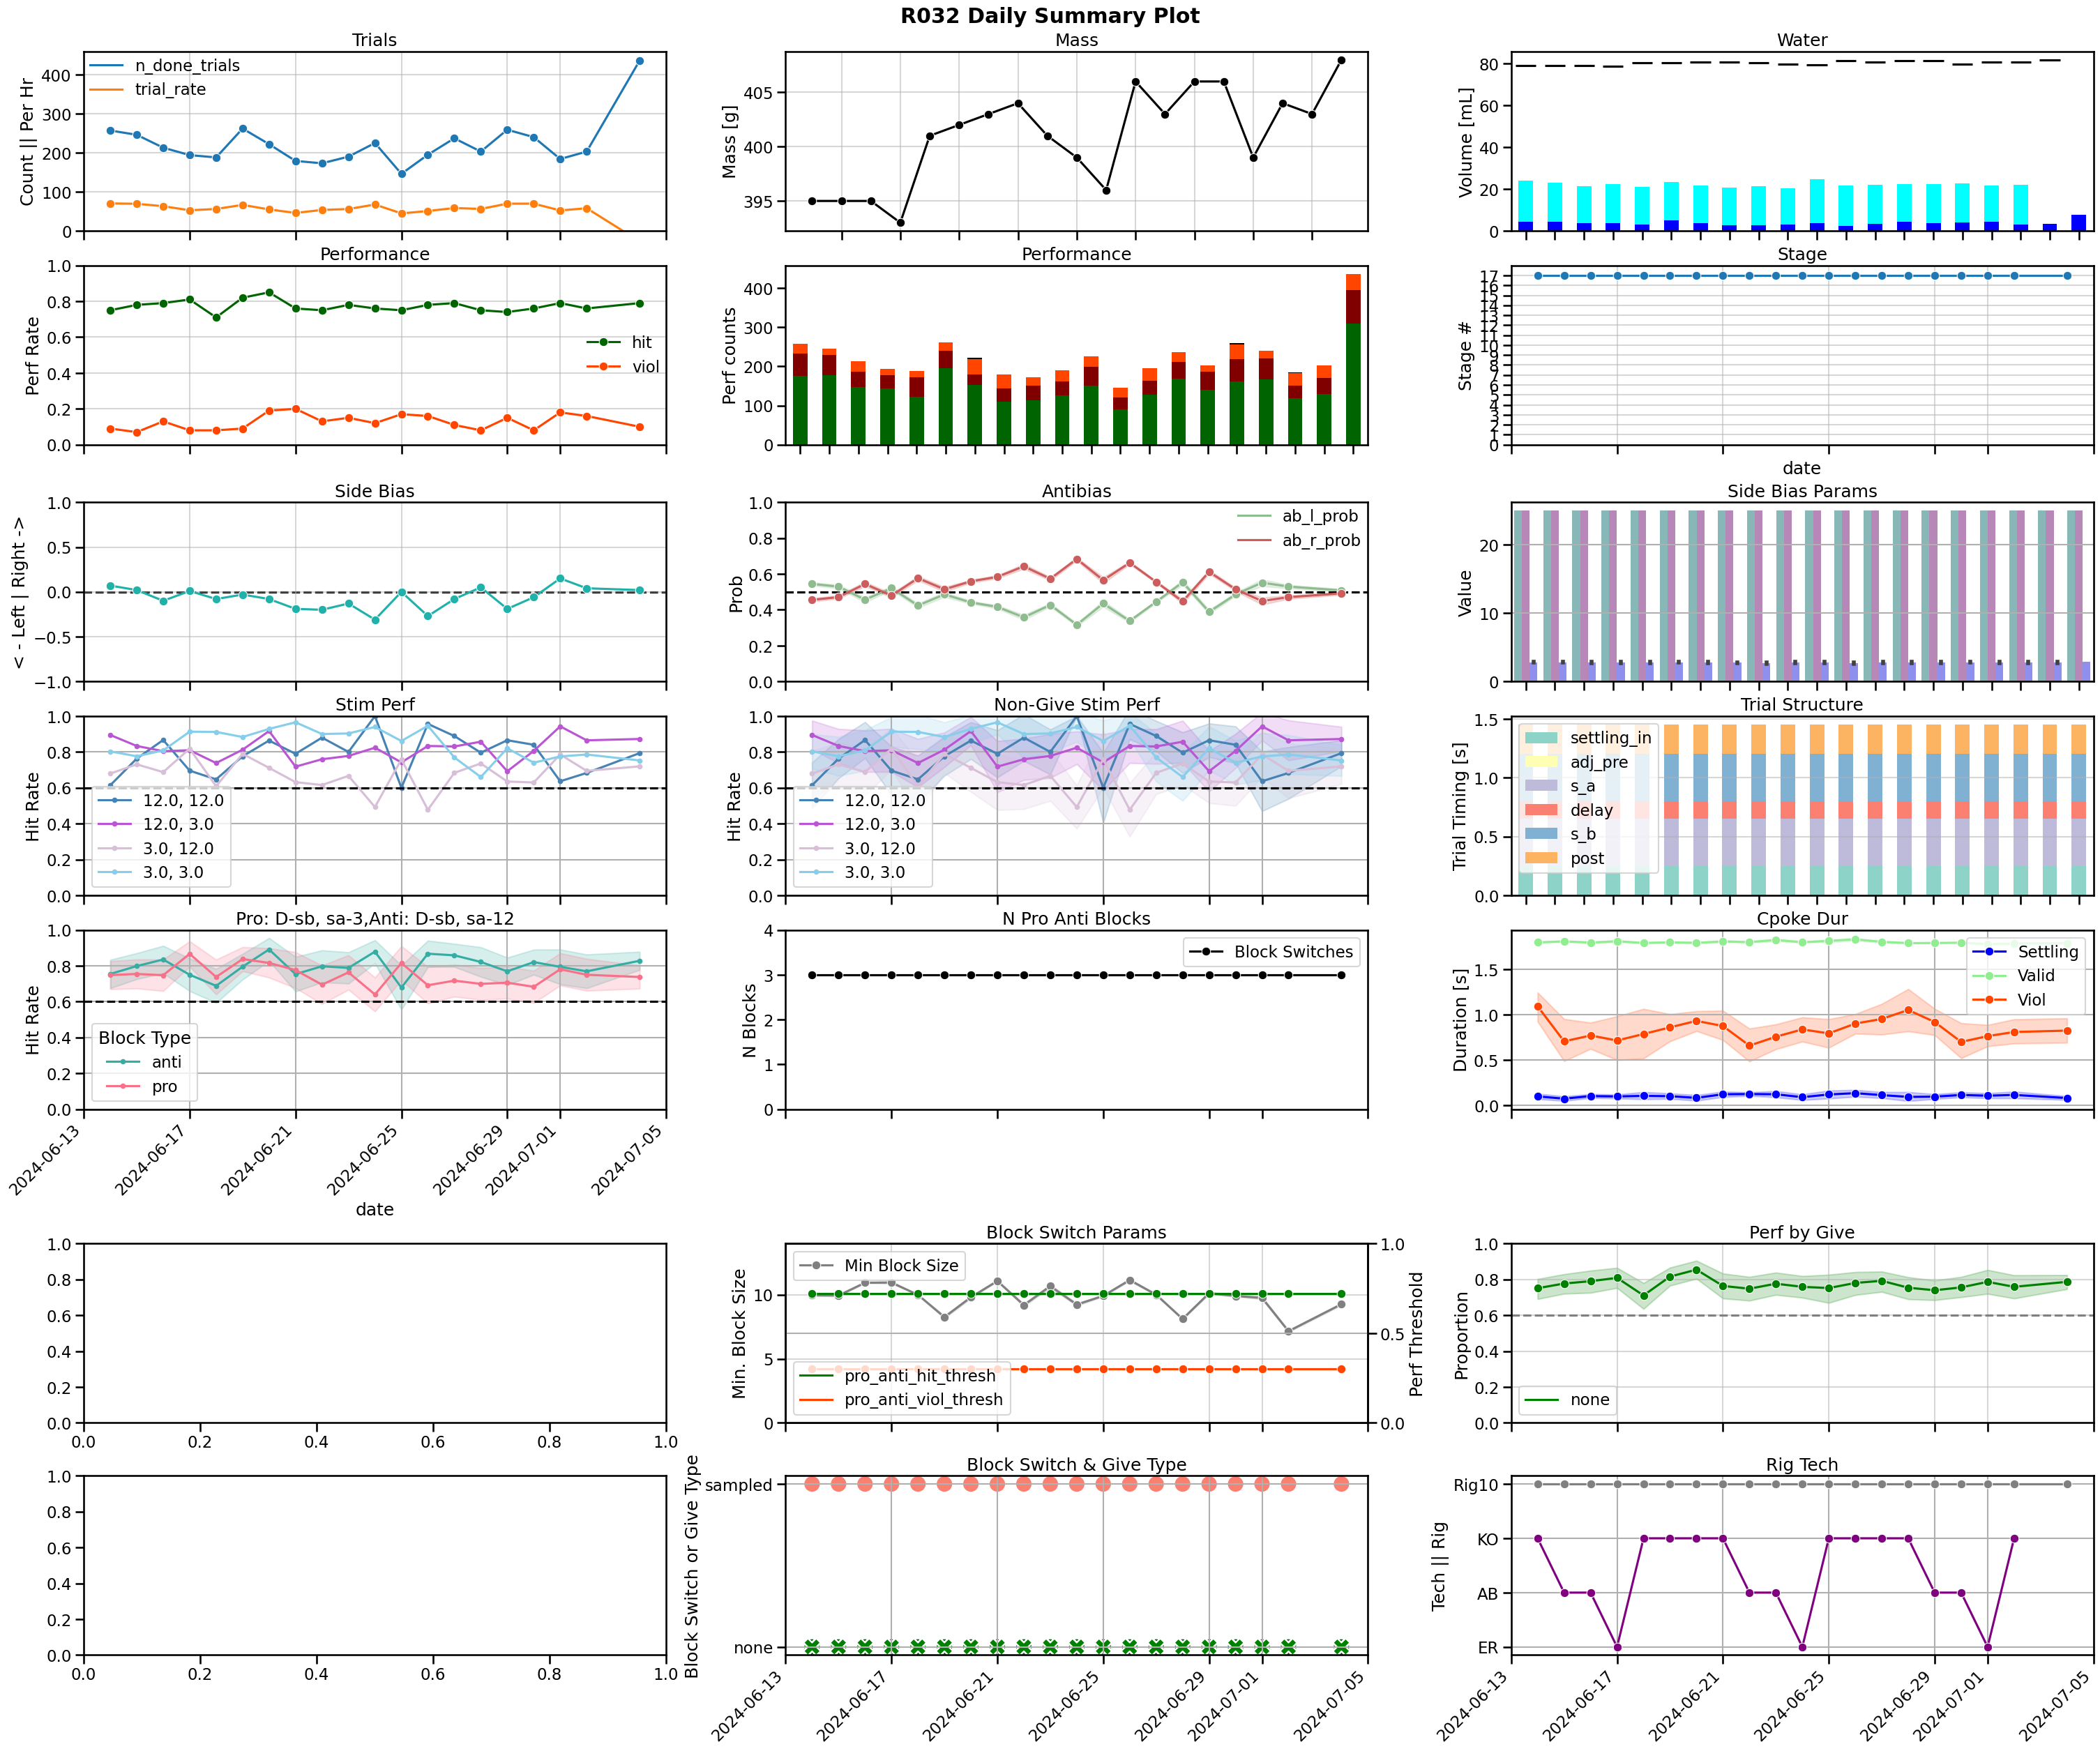

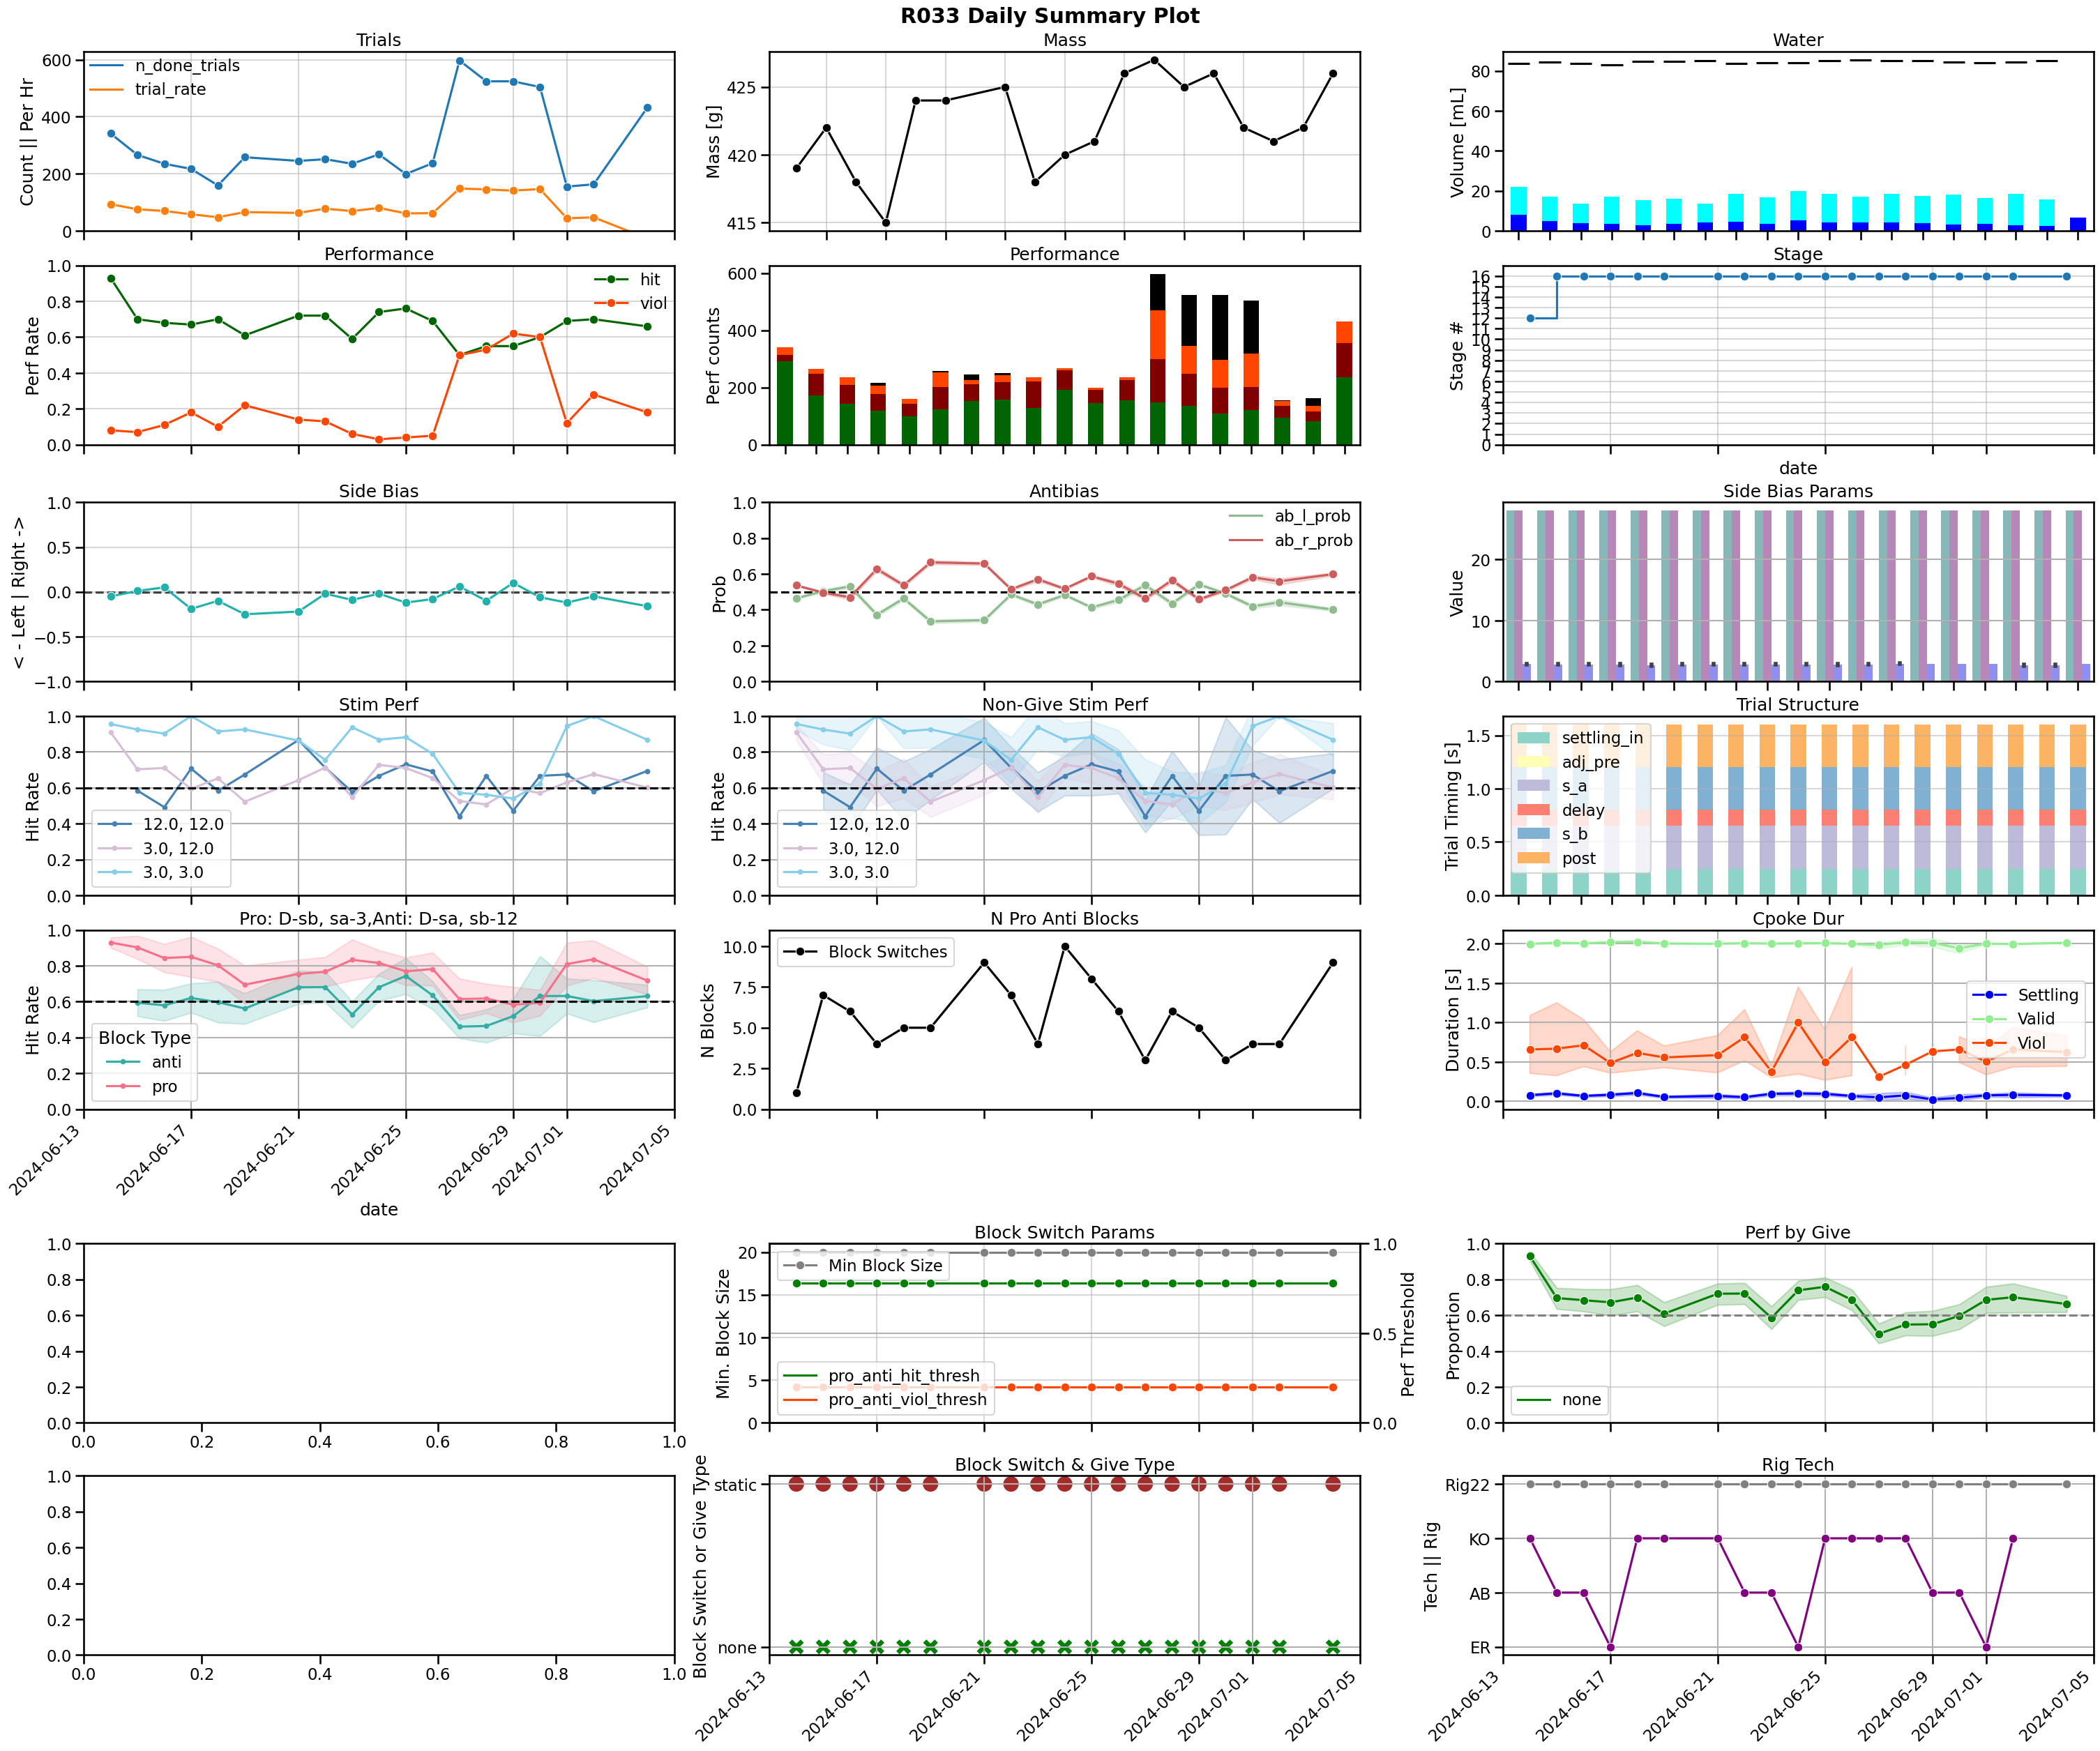

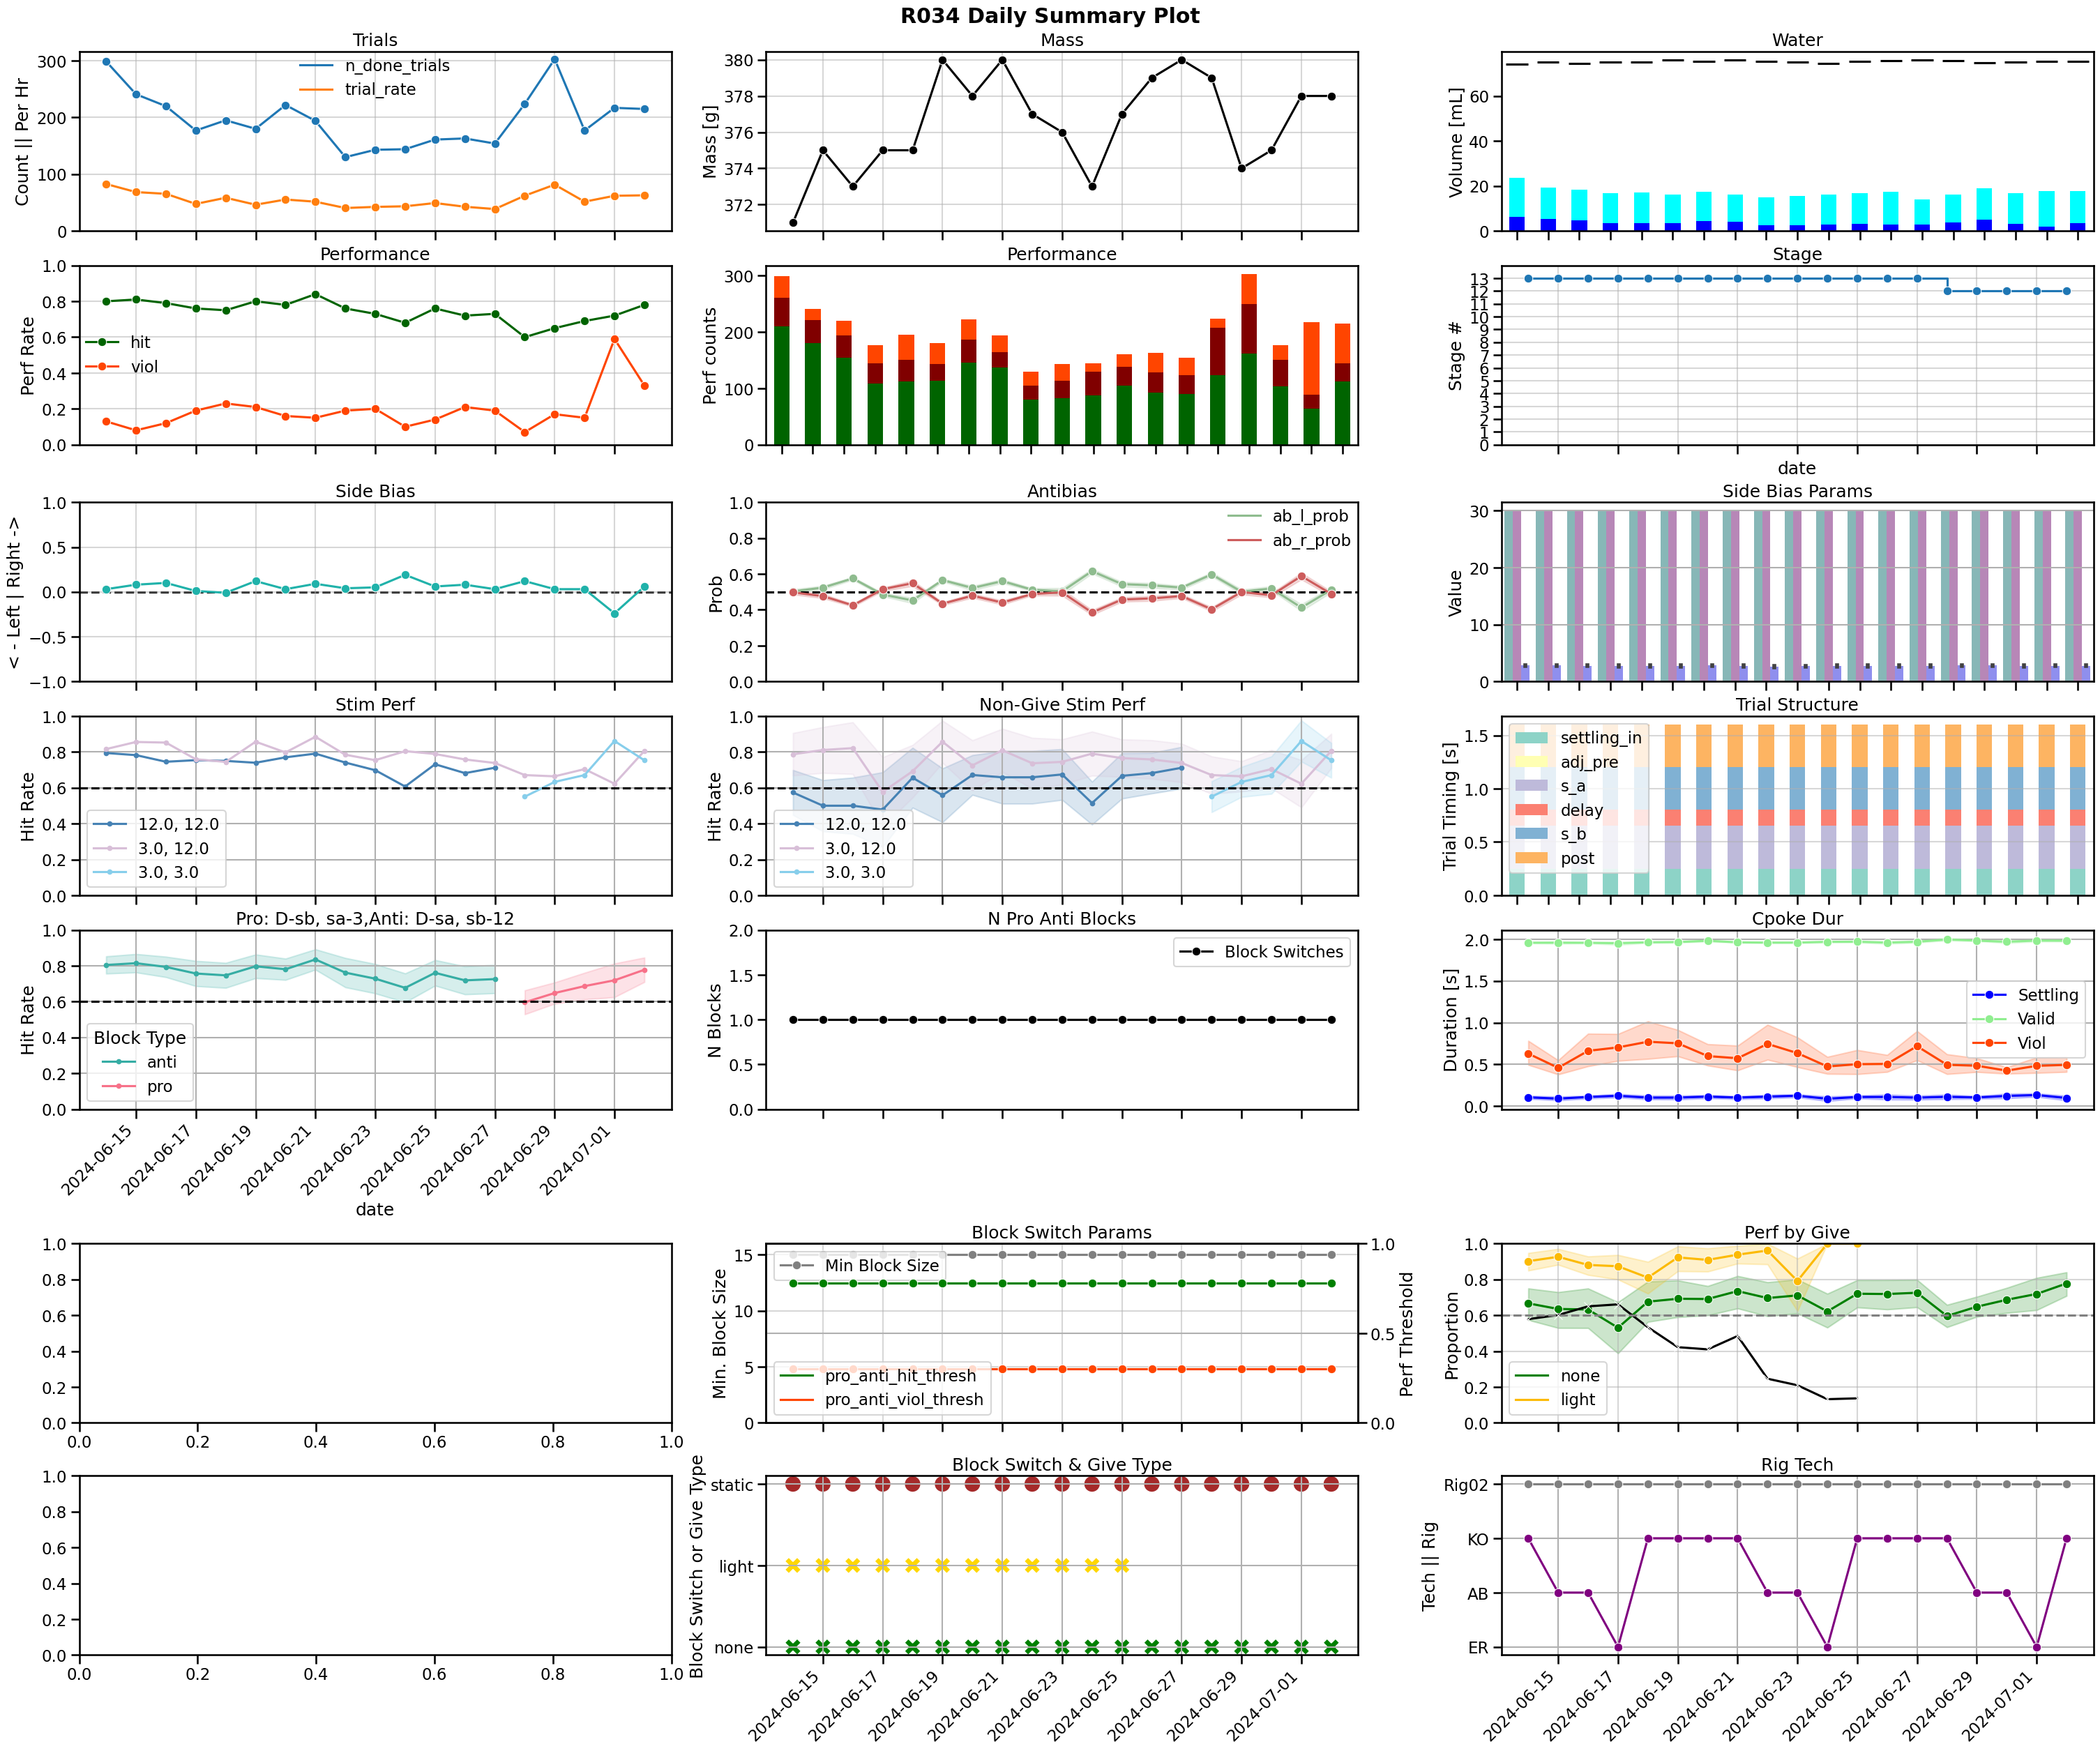

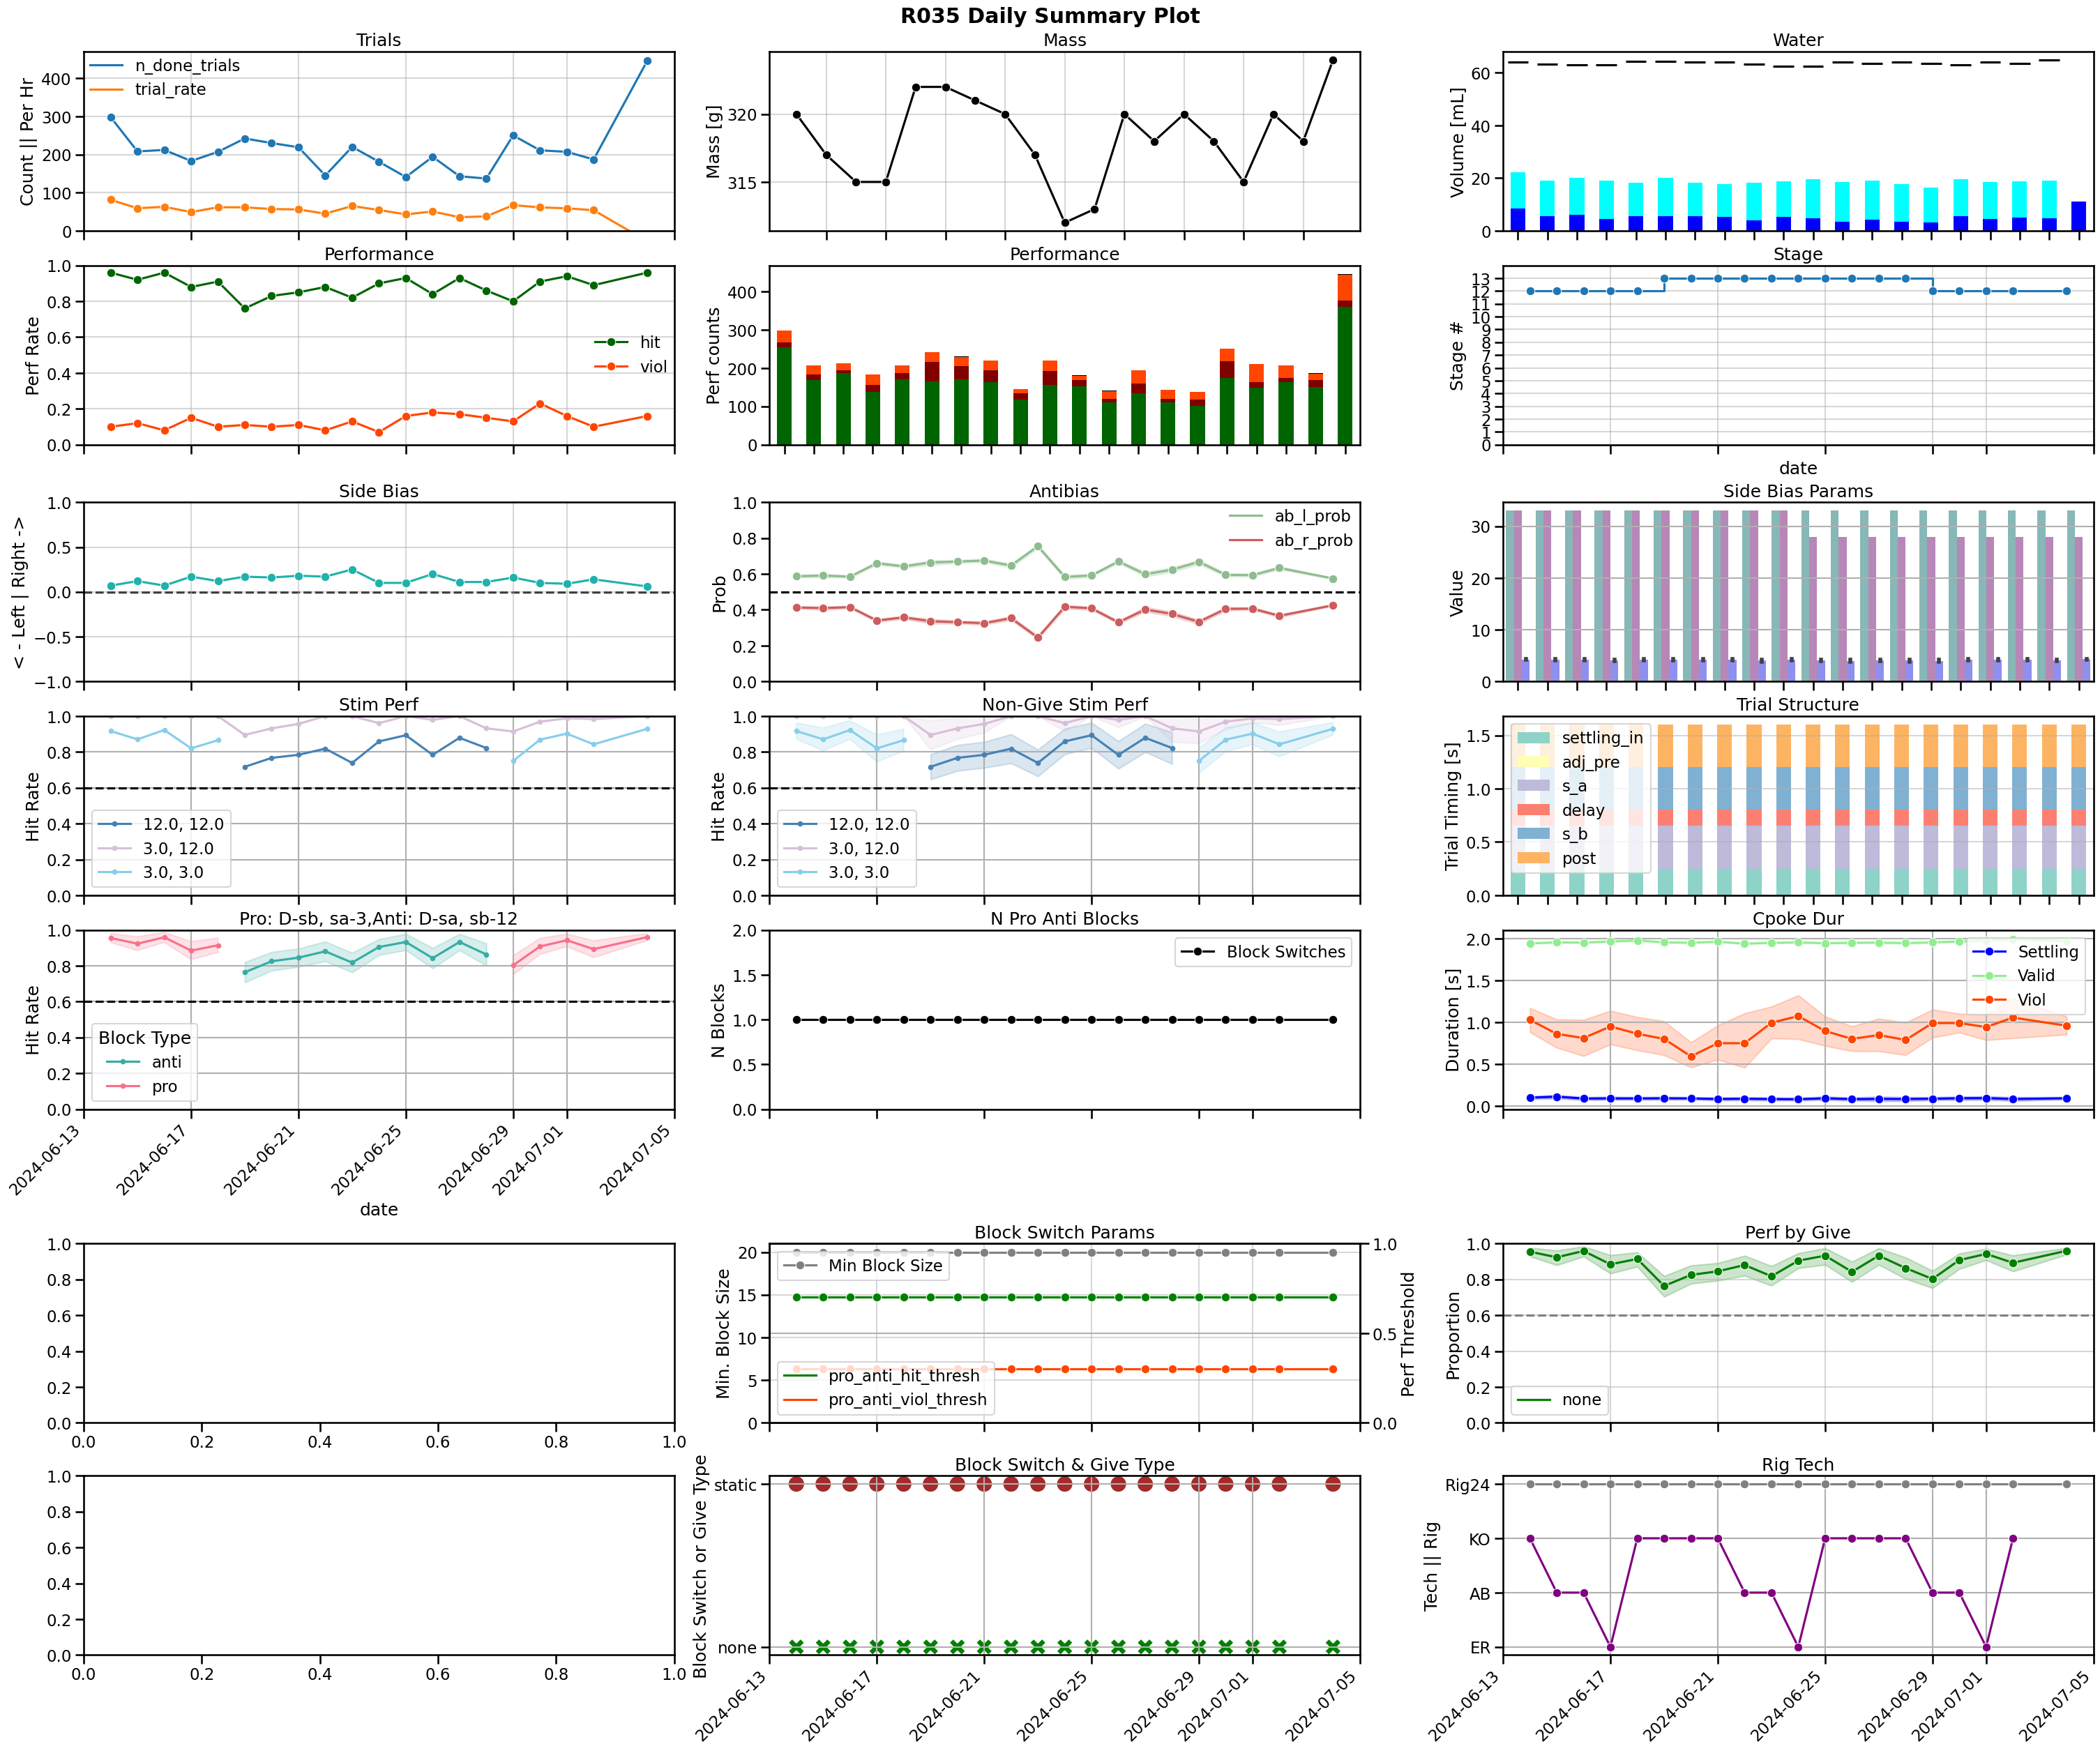

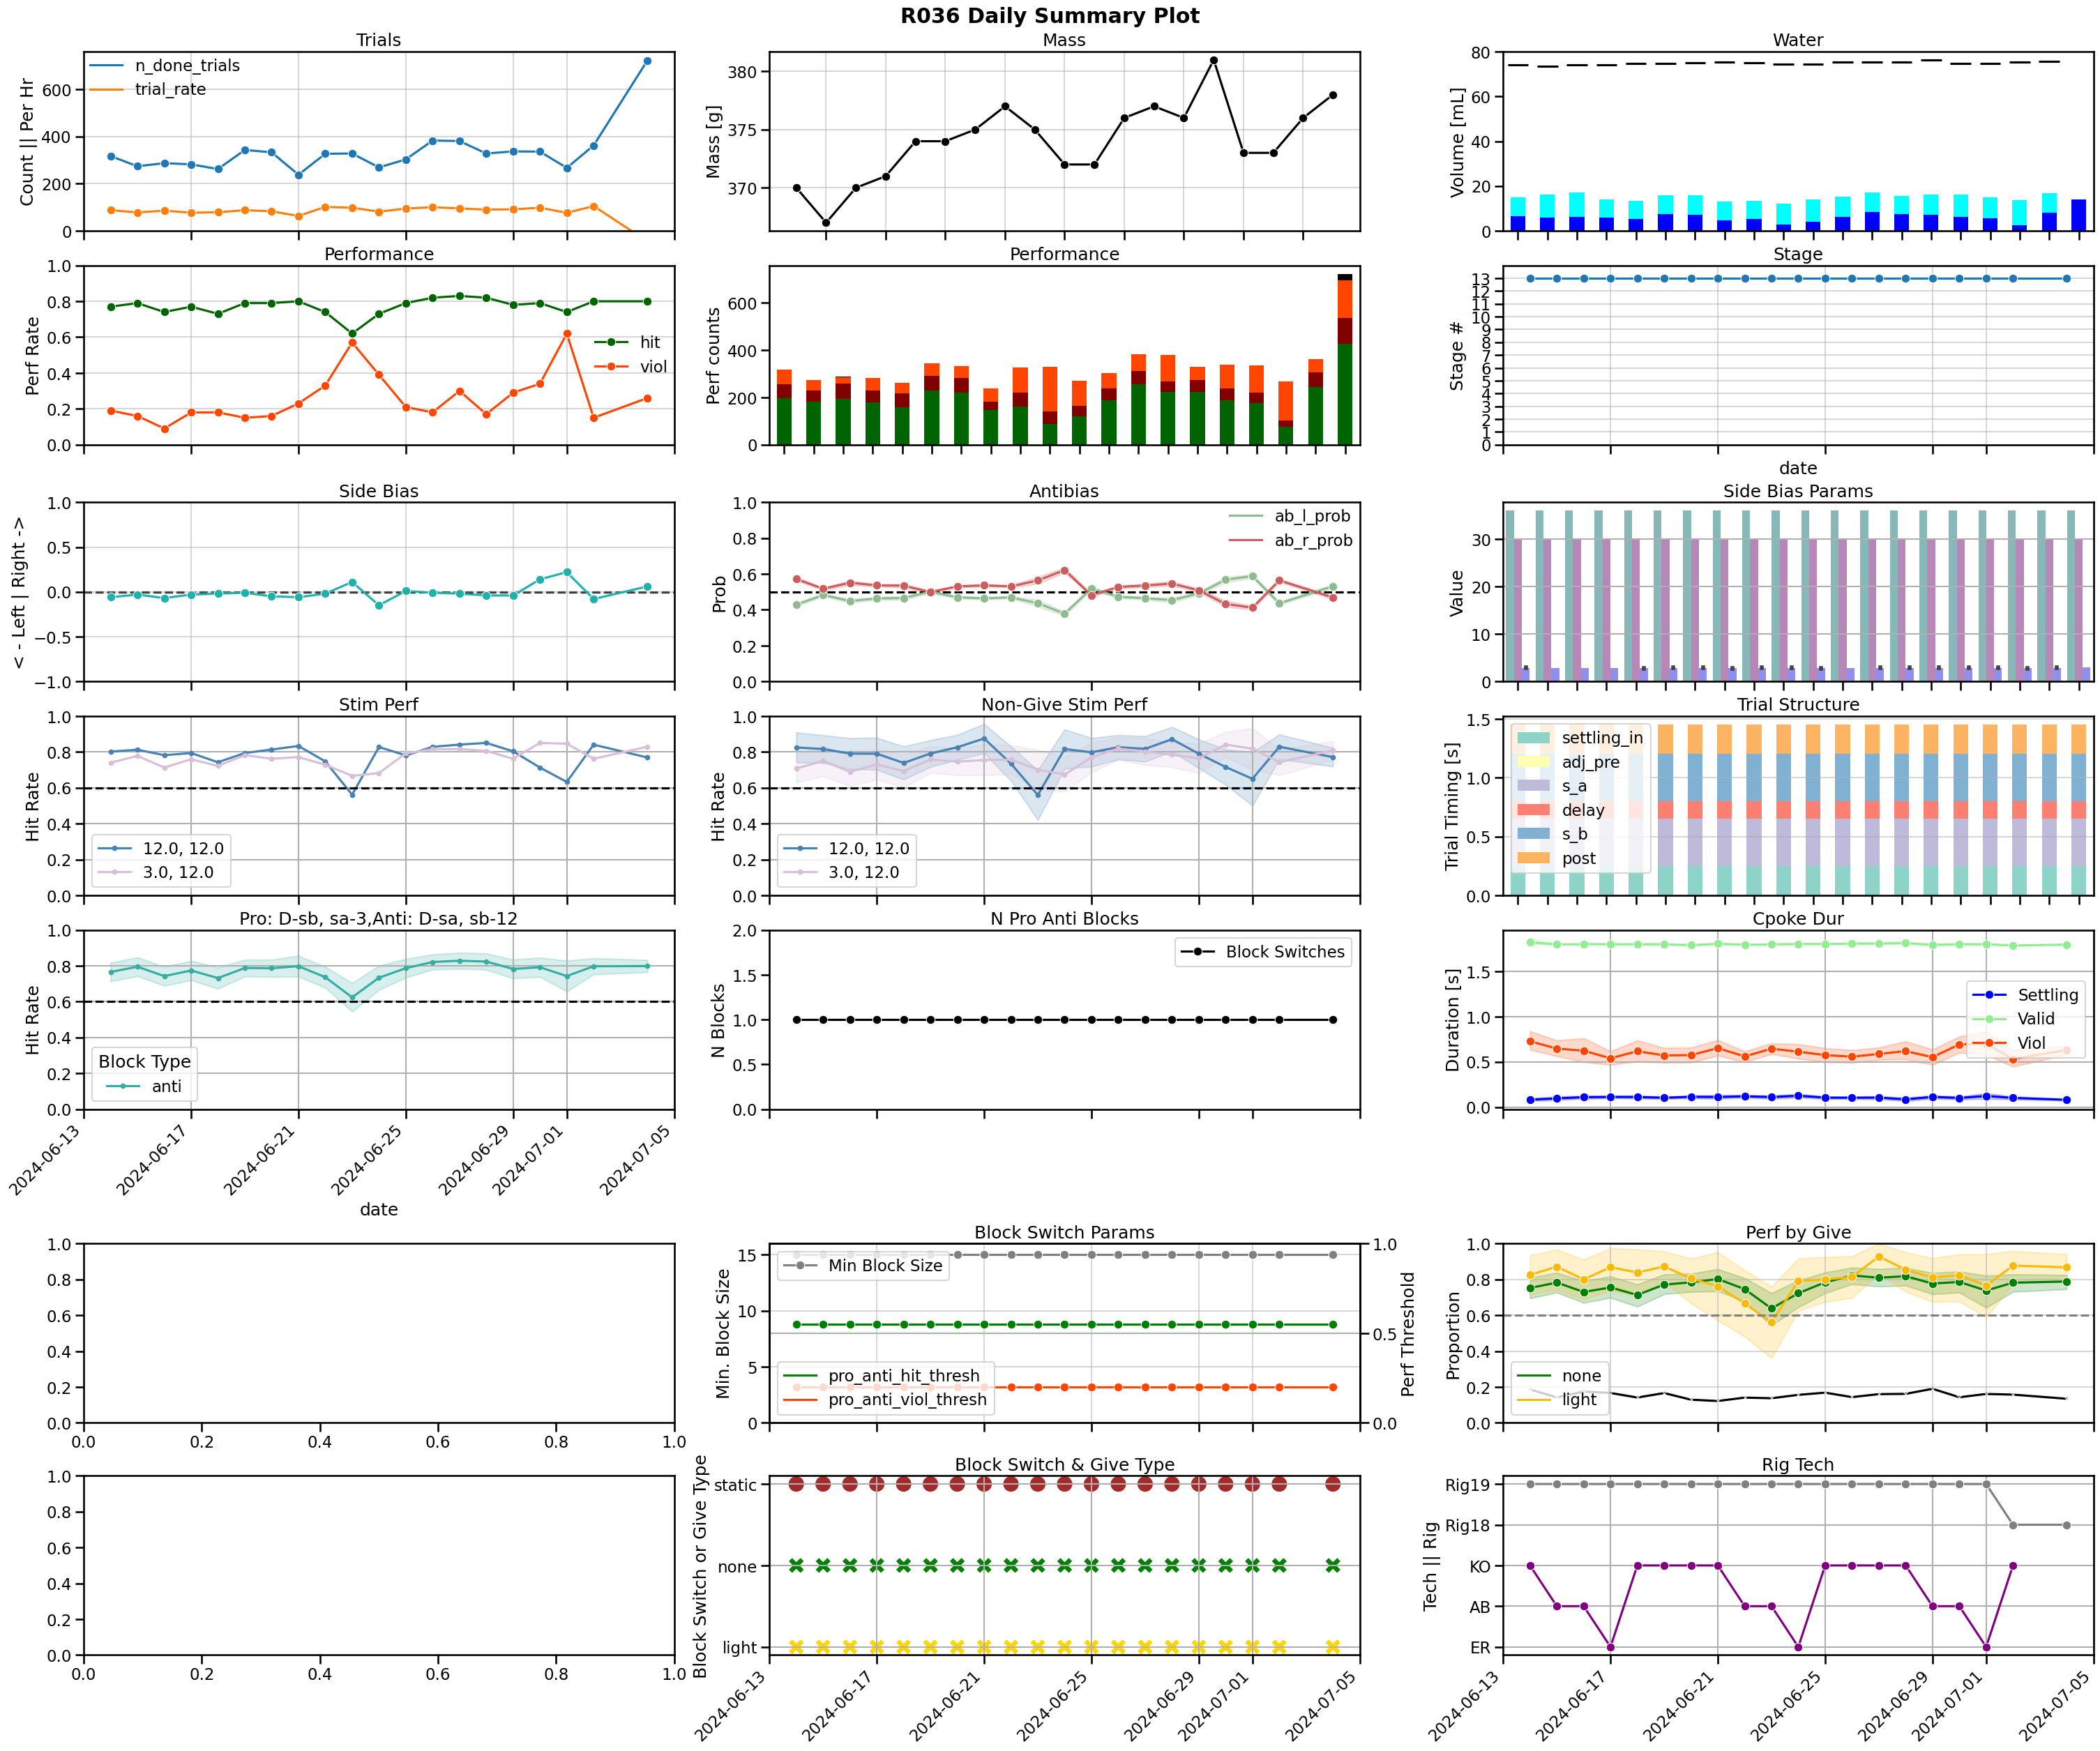

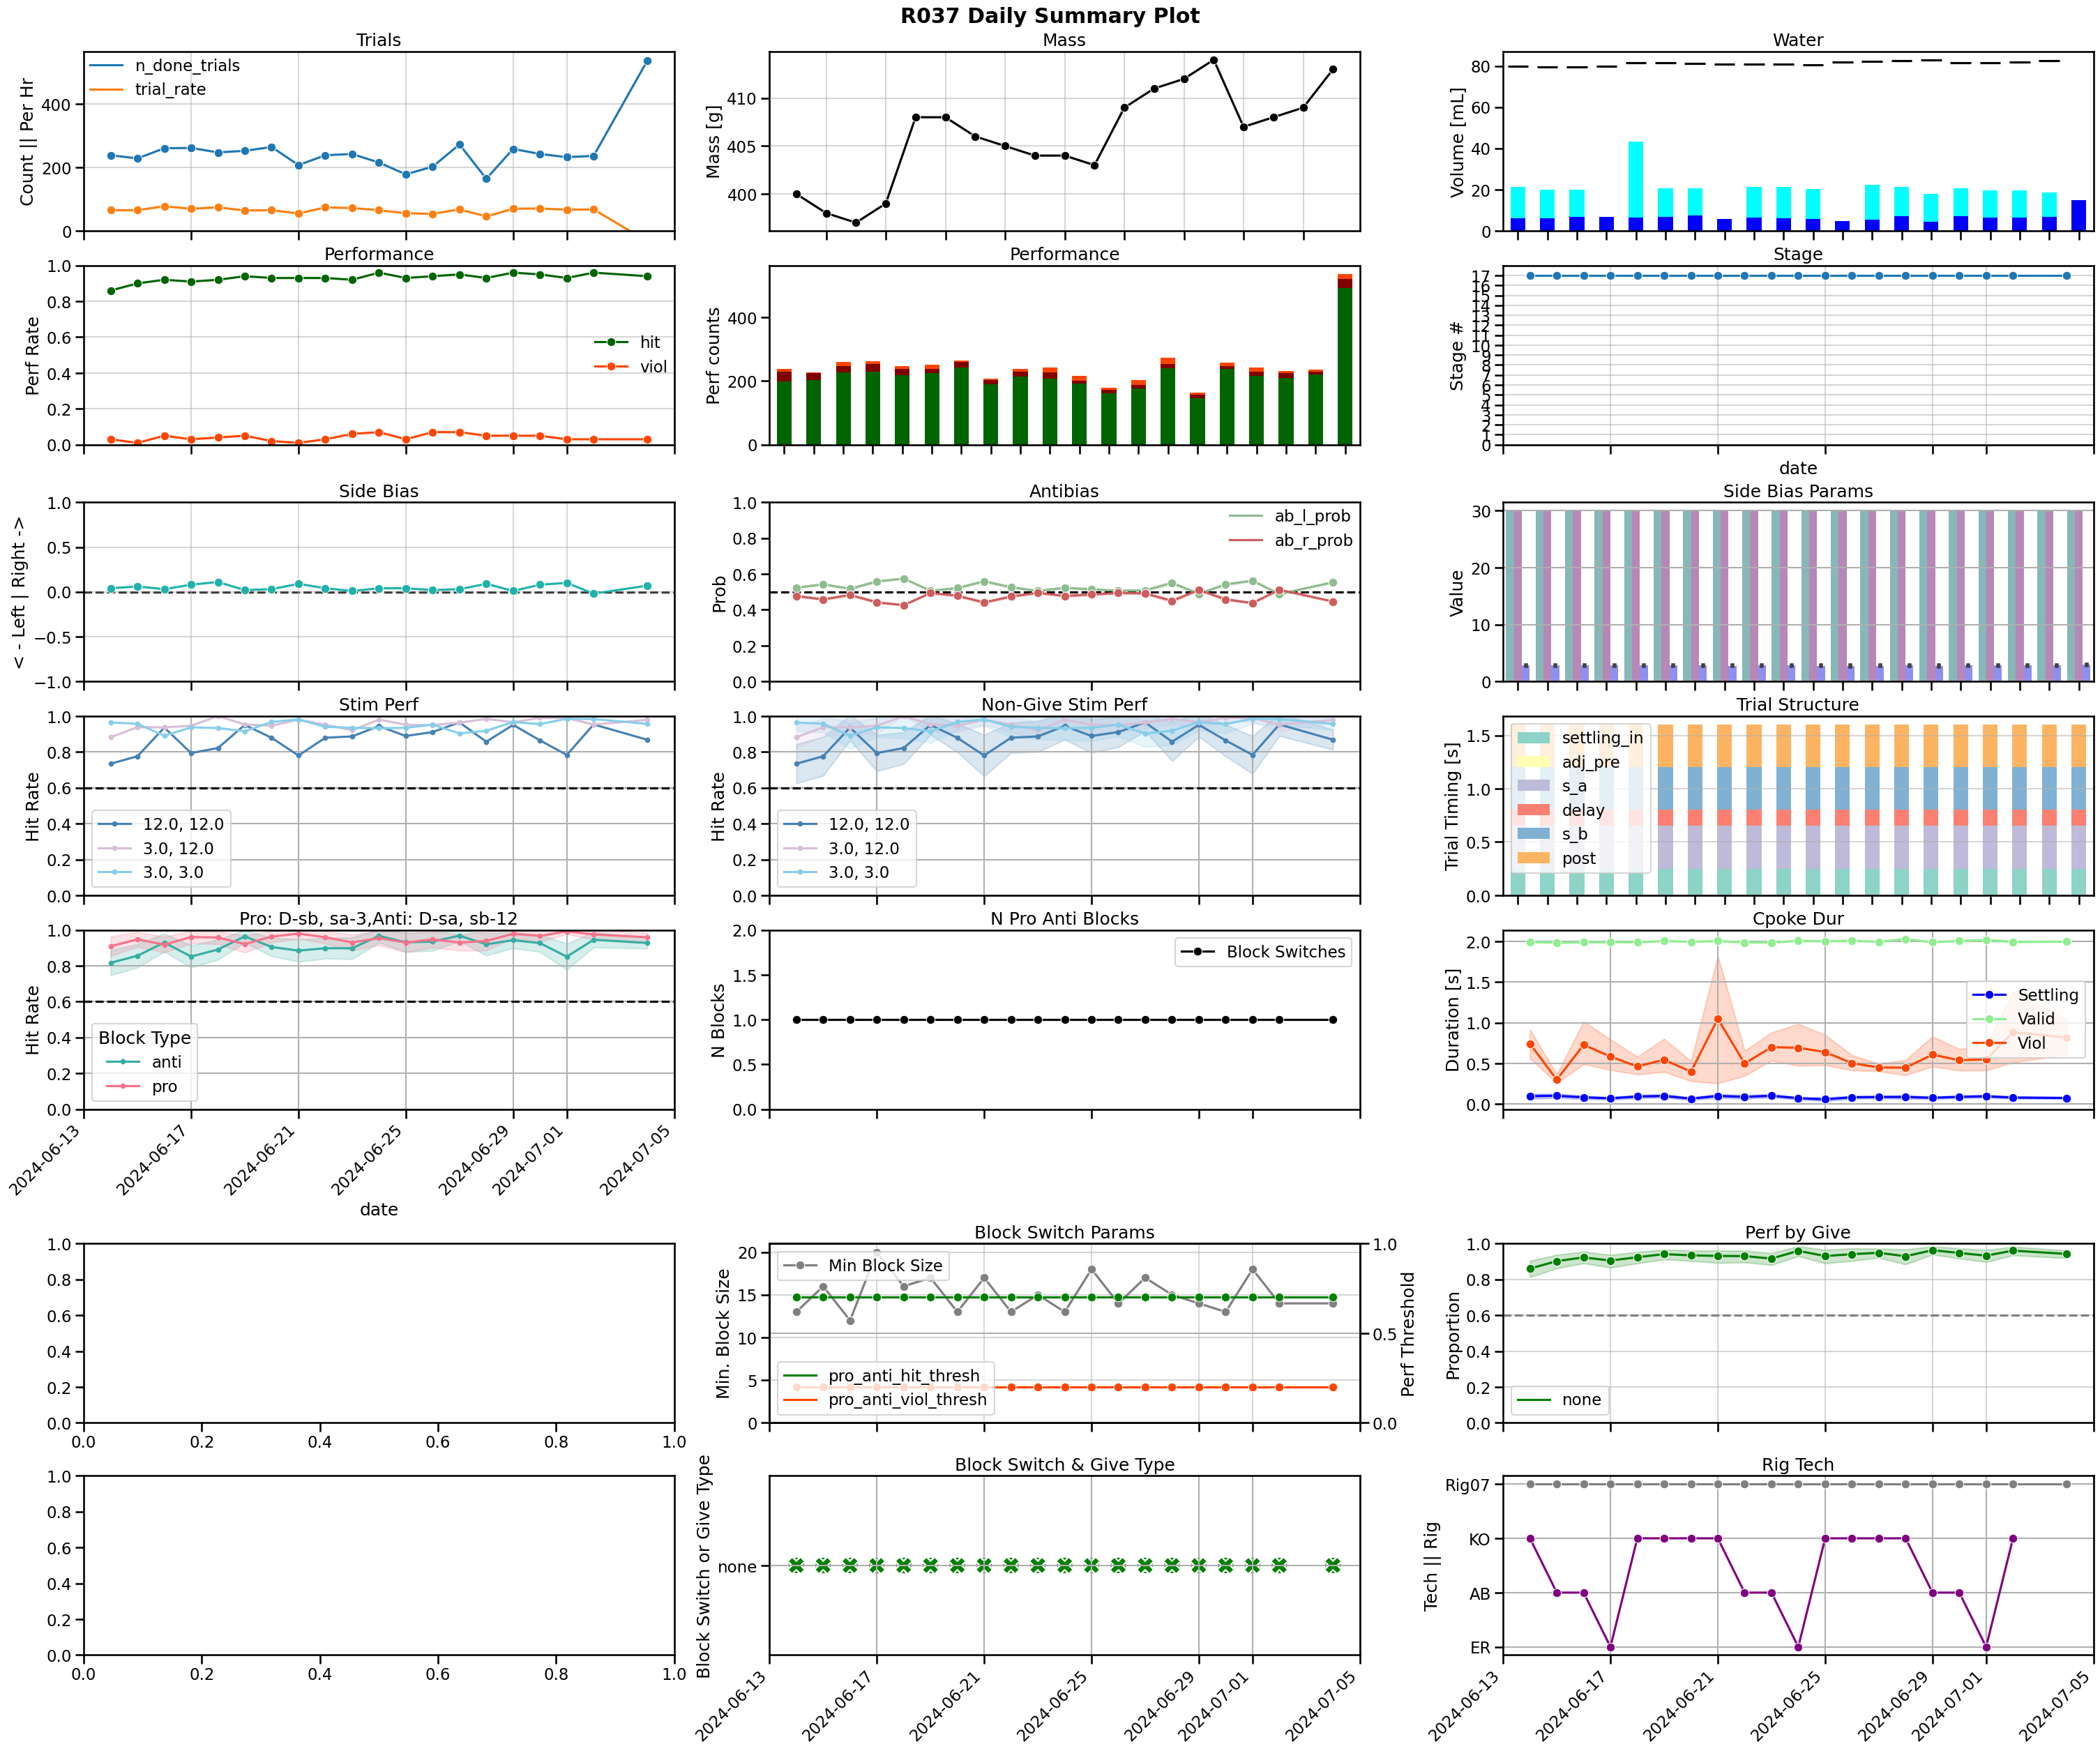

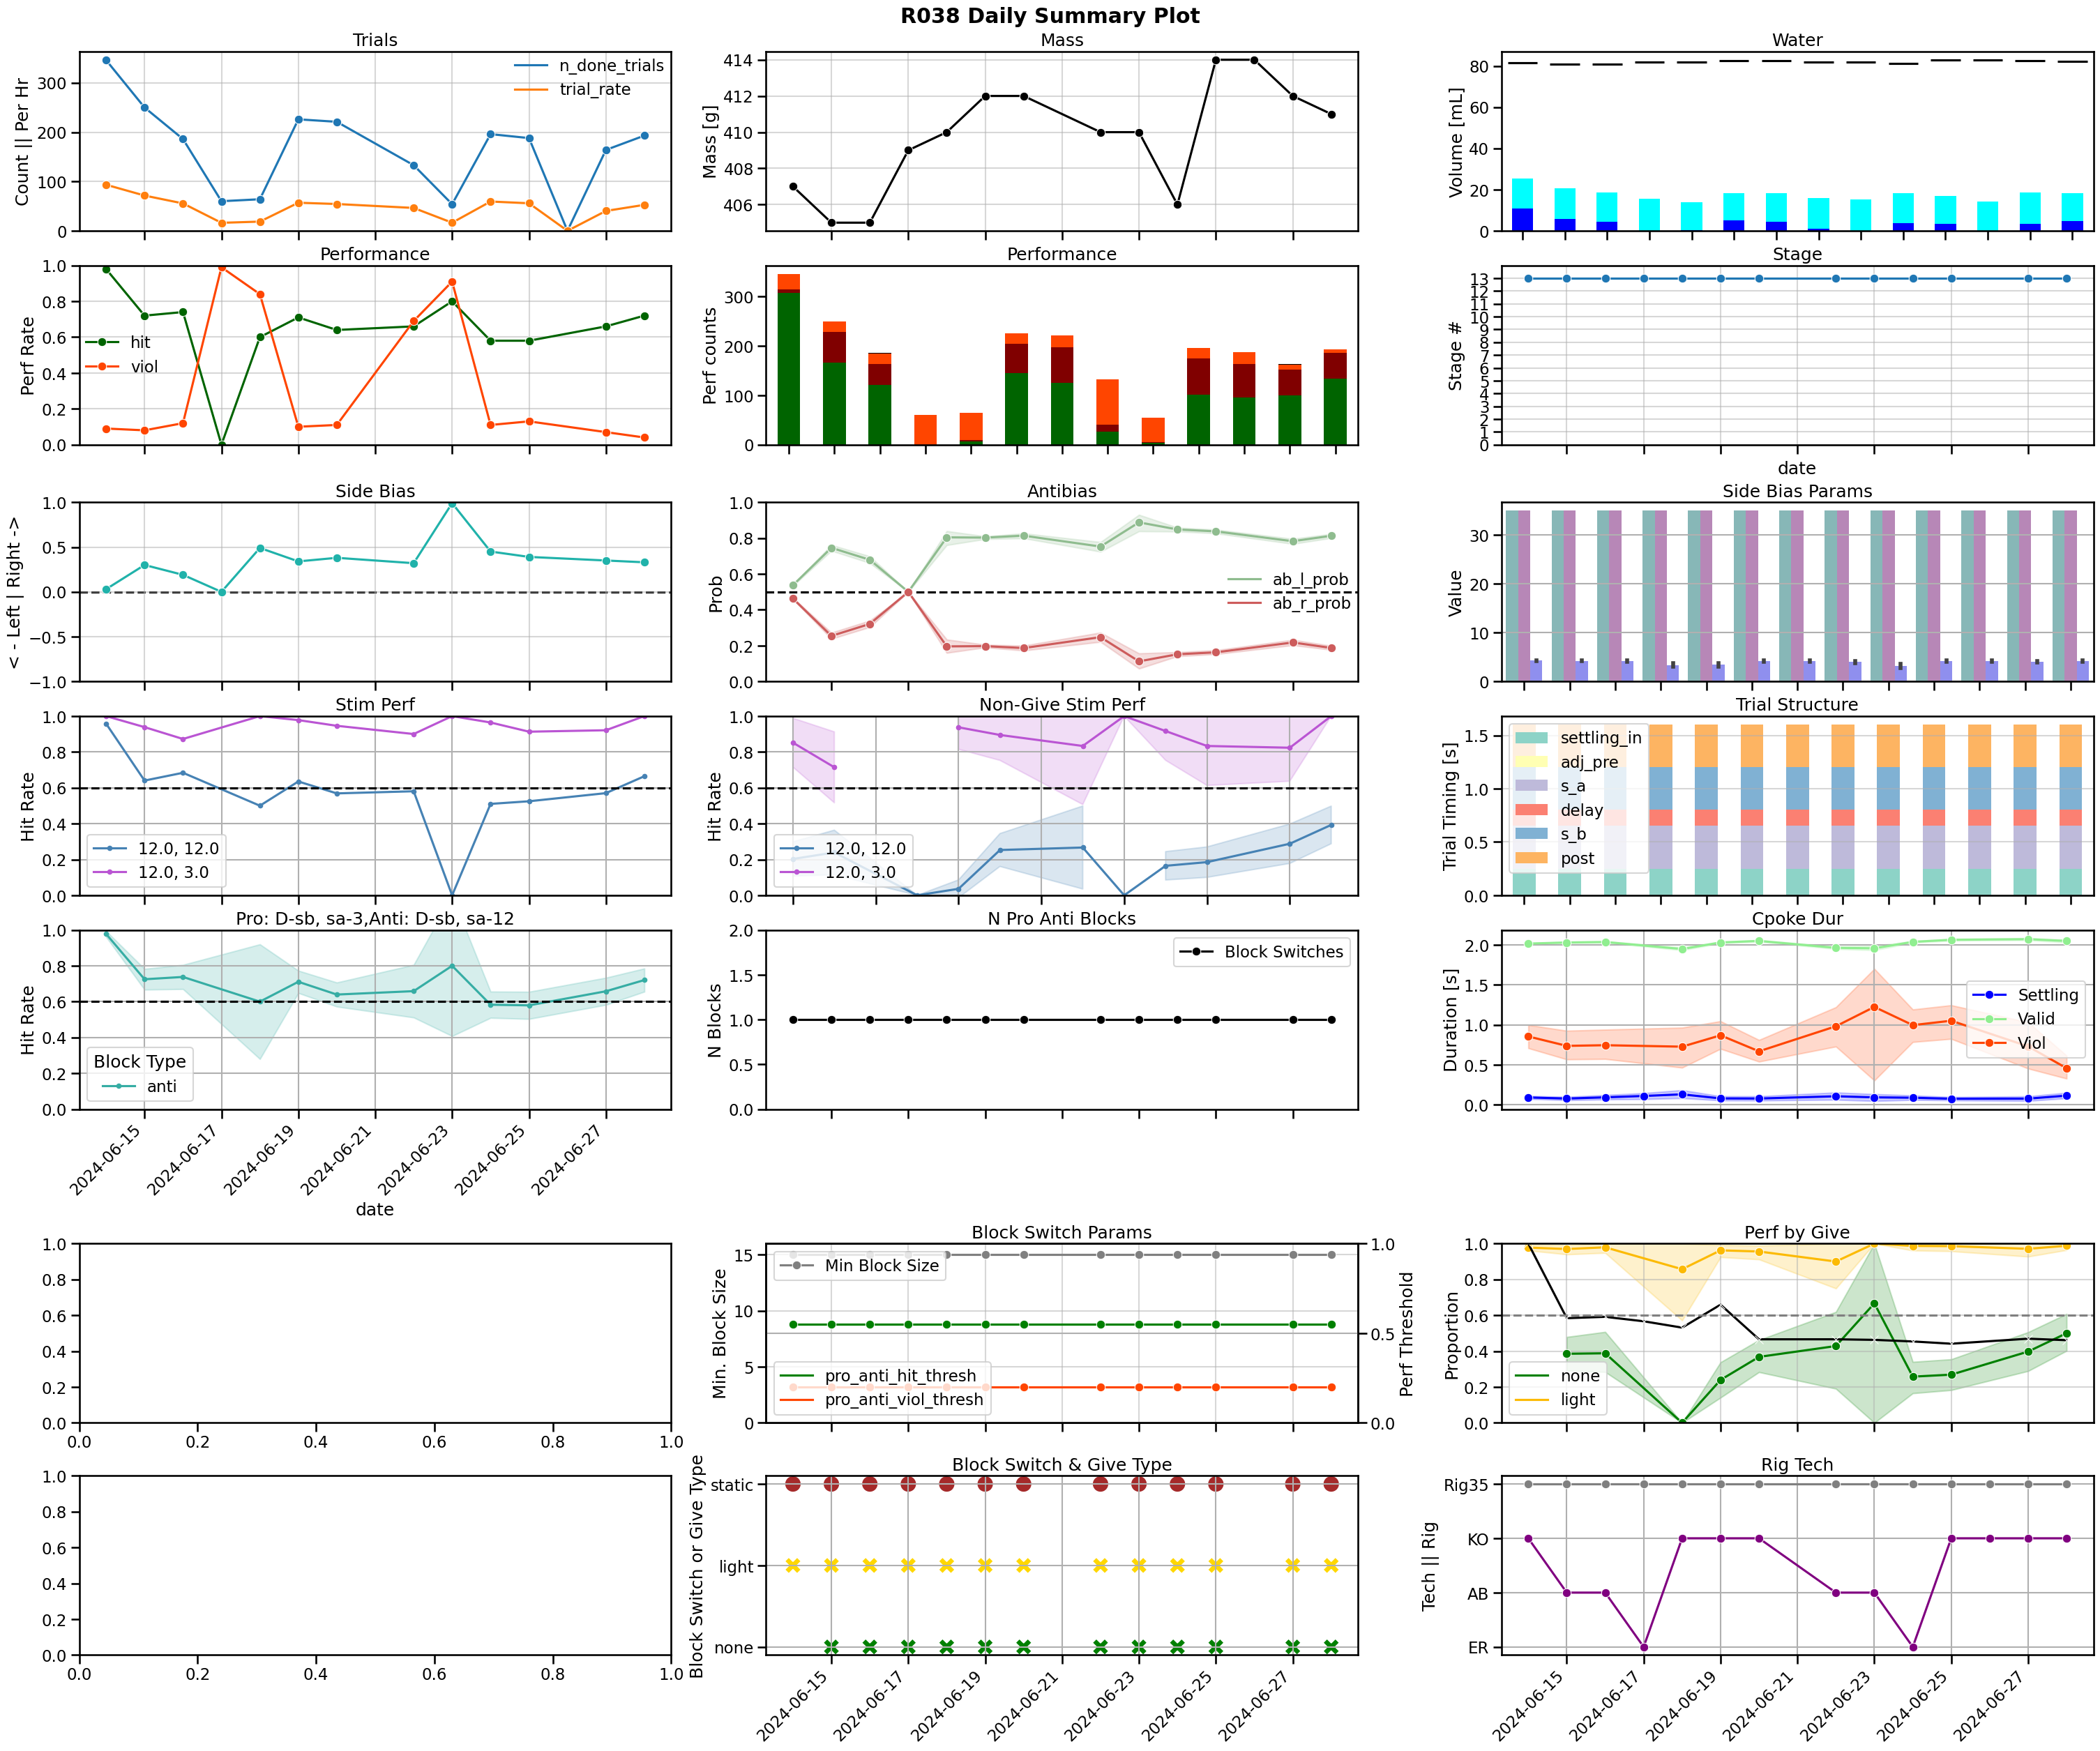

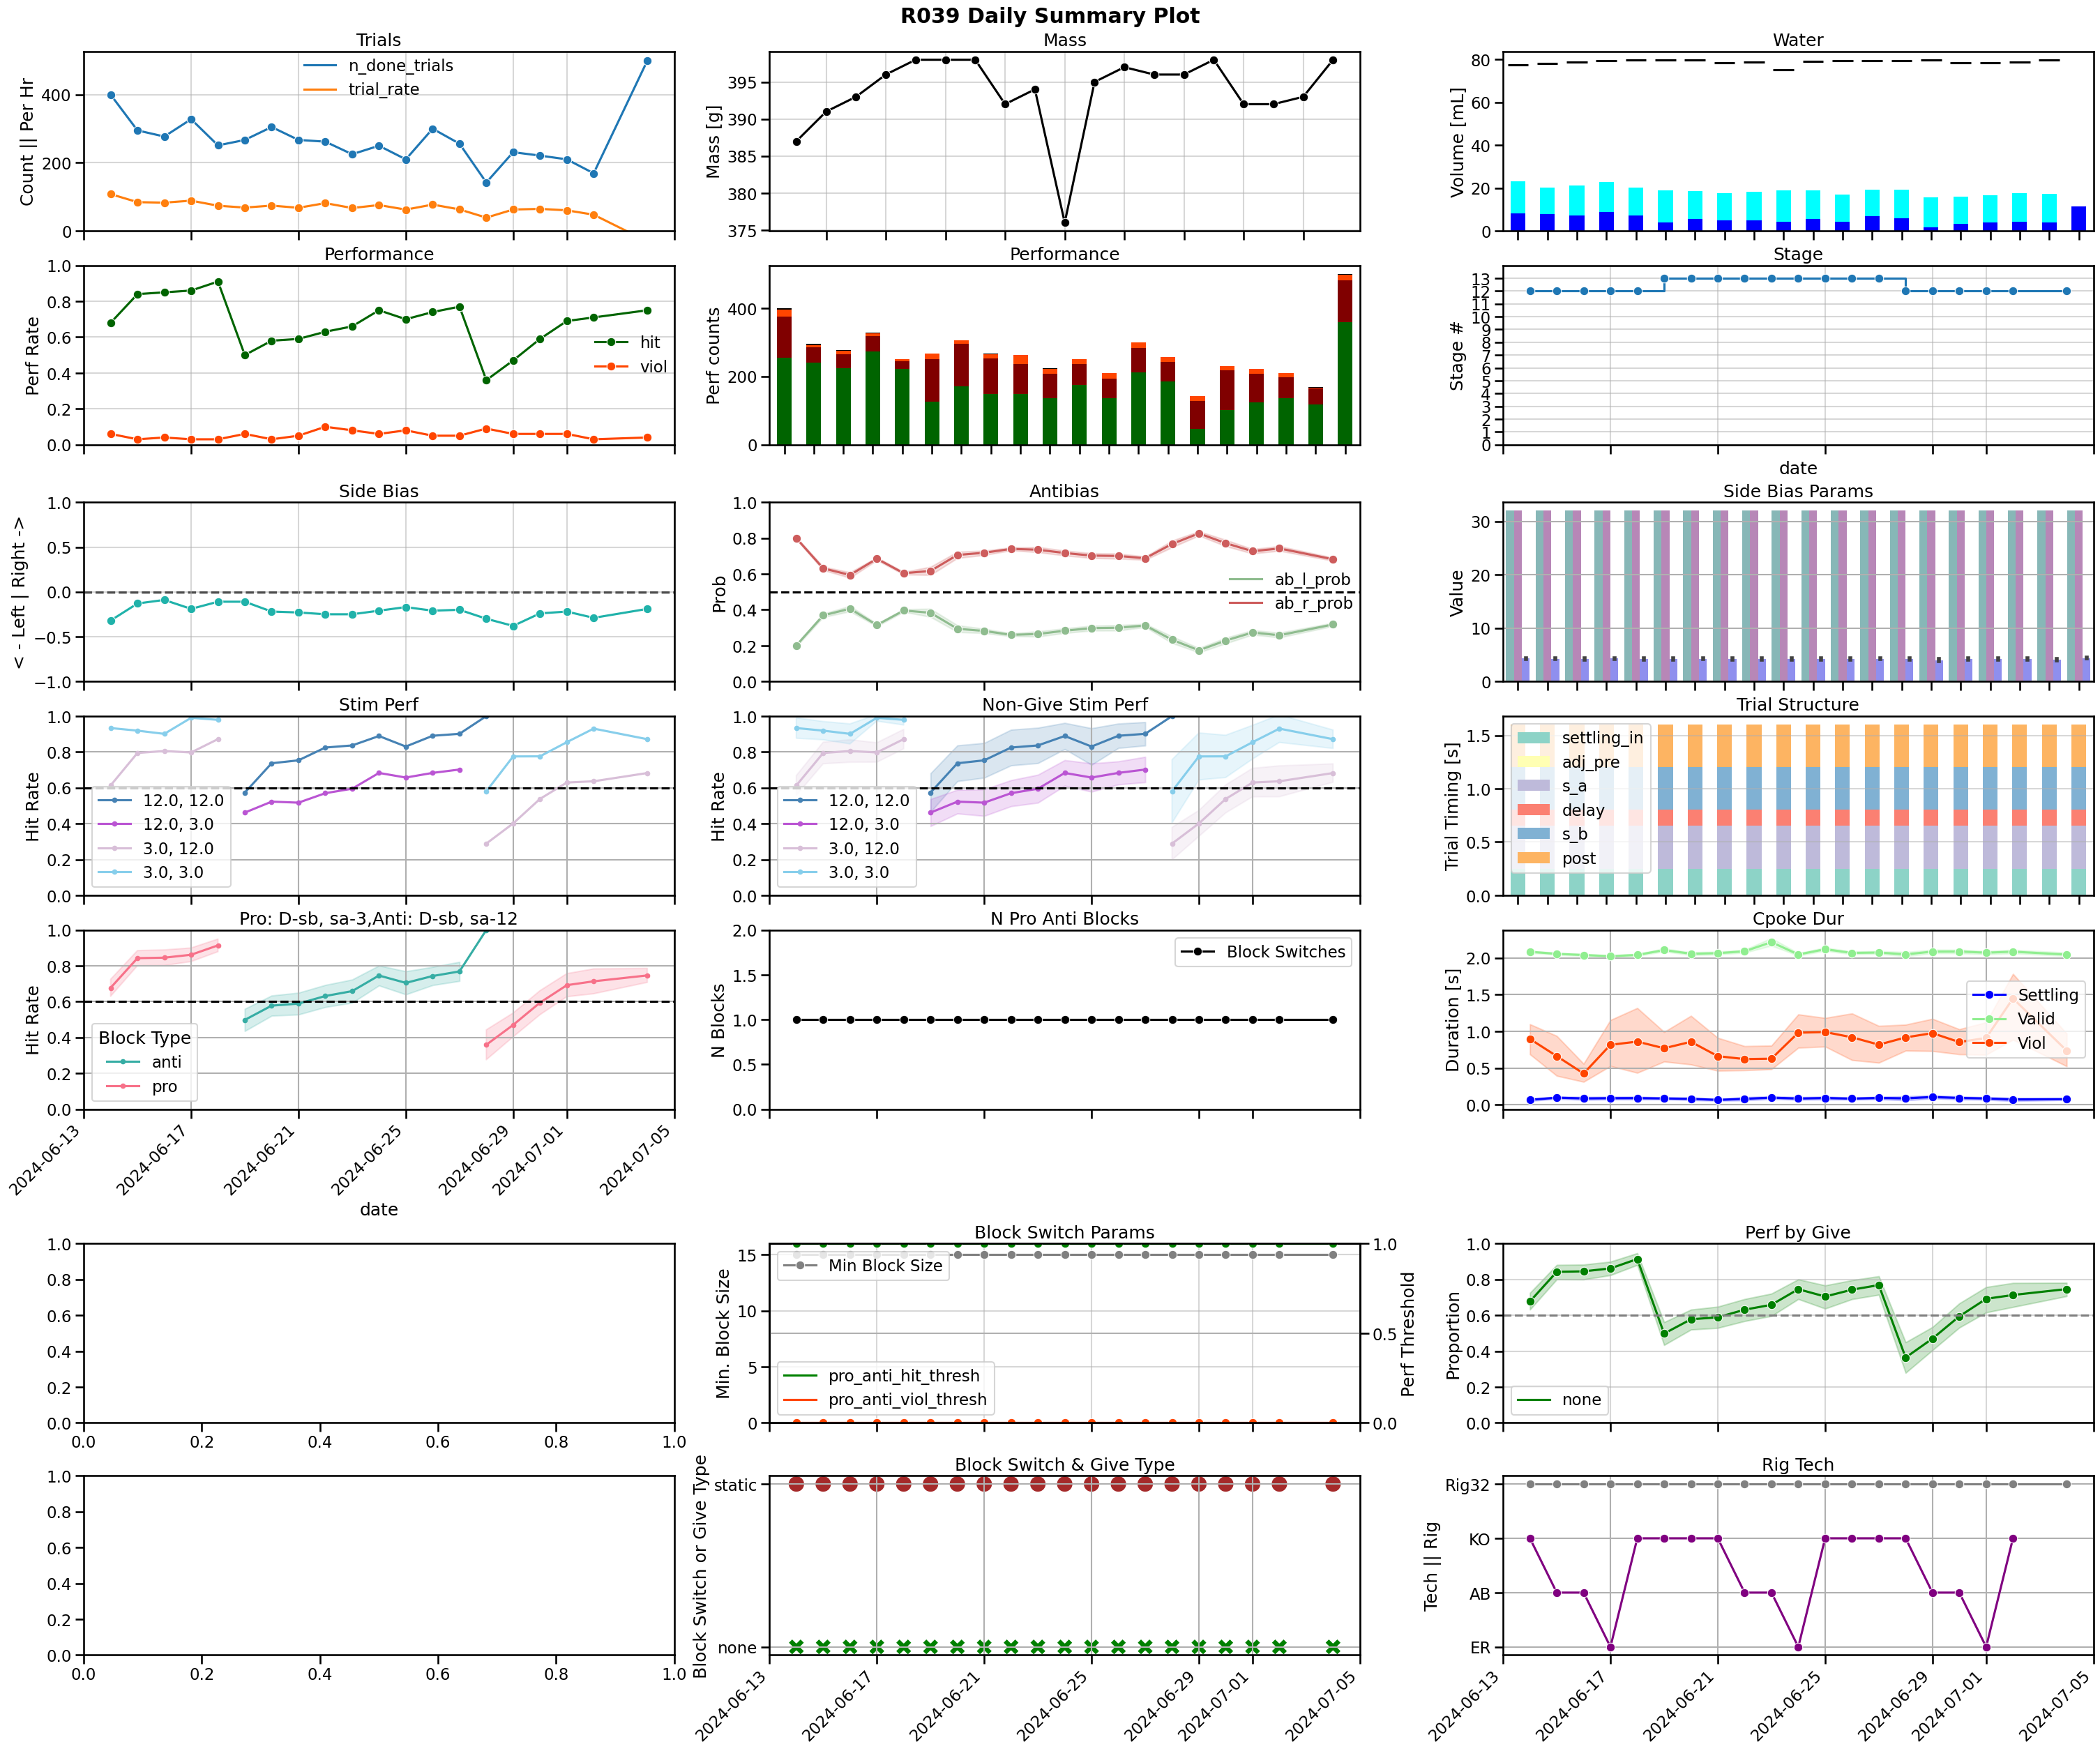

In [5]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    try:
        multiplot_multi_day_summary(
            animal_id, animal_days_df, animal_trials_df.reset_index()
        )
    except Exception as e:
        print(e)
        print(f"Failed to plot {animal_id}")
        continue

In [ ]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R039_2024-06-17_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
skipping anti give del metrics
making R030_2024-06-18_day_summary
['s_a', 'delay', 'go']
making R031_2024-06-18_day_summary
['s_a', 'delay', 'post']
making R032_2024-06-18_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R033_2024-06-18_day_summary
['s_a', 'delay', 's_b']
making R034_2024-06-18_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R035_2024-06-18_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
skipping anti give del metrics
making R036_2024-06-18_day_summary
['s_a', 'delay', 's_b', 'go']
making R037_2024-06-18_day_summary
['s_a', 's_b']
making R038_2024-06-18_day_summary
['s_a', 's_b', 'post']
making R039_2024-06-18_day_summary
['s_a', 's_b', 'post', 'go']
skipping anti give del metrics
making R030_2024-06-19_day_summary
['s_a', 's_b', 'go']
skipping anti give del metrics
making R031_2024-06-19_day_summary
['s_a', 'delay', 's_b', 'post']
making R032_2024-06-19_day_summary
['s_a', 'del